In [ ]:
# Download dataset on kaggle website.
import kagglehub
zusmani_pakistans_largest_ecommerce_dataset_path = kagglehub.dataset_download('zusmani/pakistans-largest-ecommerce-dataset')

print('Data source import complete.')


Data source import complete.


# Phân Tích Dữ Liệu Thương Mại Điện Tử ở Pakistan

### Giới thiệu chung:
Bộ dữ liệu chứa thông tin chi tiết của nửa triệu đơn hàng thương mại điện tử tại Pakistan từ tháng 3 năm 2016 đến tháng 8 năm 2018. Nó bao gồm thông tin chi tiết về mặt hàng, phương thức vận chuyển, phương thức thanh toán như thẻ tín dụng, Easy-Paisa, Jazz-Cash, thanh toán khi nhận hàng (cash-on-delivery), các danh mục sản phẩm như thời trang, điện thoại di động, điện tử, thiết bị gia dụng, v.v., ngày đặt hàng, SKU, giá, số lượng, tổng cộng và ID khách hàng. Đây là bộ dữ liệu chi tiết nhất về thương mại điện tử tại Pakistan mà bạn có thể tìm thấy trong phạm vi công cộng (Public domain).
https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset/data

## 1. Các thư viện sử dụng

In [ ]:
# Thư viện xử lý dữ liệu
import pandas as pd
import numpy as np
from scipy import stats

# Thư viện trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

# Đảm bảo rằng biểu đồ sẽ hiển thị trực tiếp trong Jupyter Notebook
%matplotlib inline

# Tắt các cảnh báo không quan trọng để tránh làm rối kết quả hiển thị
import warnings
warnings.simplefilter('ignore')

# In thông báo khi đã nhập thư viện thành công
print('Successfully Import Libraries')


Successfully Import Libraries


## 2. Khám phá dữ liệu

### 2.1 Nhập dữ liệu

In [ ]:
df = pd.read_csv("/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv")

print('Successfully Load Data')

Successfully Load Data


### 2.2 Hiển thị dữ liệu sơ bộ ban đầu

In [ ]:
# Hiển thị tất cả các cột
pd.set_option('display.max_columns', None)

# Hiển thị vài dòng đầu tiên
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 1048575
Number of columns : 26


In [ ]:
# Tên các cột
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [ ]:
# Kiểm tra kiểu dữ liệu
df.dtypes

,0
item_id,float64
status,object
created_at,object
sku,object
price,float64
qty_ordered,float64
grand_total,float64
increment_id,object
category_name_1,object
sales_commission_code,object


In [ ]:
# Thông tin về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [ ]:
# Hiển thị số thực (float) mà không dùng ký hiệu khoa học
pd.set_option('display.float_format', '{:.0f}'.format)

# Hiển thị thống kê mô tả của các cột số trong DataFrame
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524,584524,584524,584524,584524,584524,584524,584513,0,0,0,0,0
mean,565667,6349,1,8531,499,2017,7,45791,NaN,NaN,NaN,NaN,NaN
std,200121,14949,4,61321,1507,1,3,34415,NaN,NaN,NaN,NaN,NaN
min,211131,0,1,-1594,-600,2016,1,1,NaN,NaN,NaN,NaN,NaN
25%,395001,360,1,945,0,2017,4,13516,NaN,NaN,NaN,NaN,NaN
50%,568424,899,1,1960,0,2017,7,42856,NaN,NaN,NaN,NaN,NaN
75%,739106,4070,1,6999,160,2018,11,73536,NaN,NaN,NaN,NaN,NaN
max,905208,1012626,1000,17888000,90300,2018,12,115326,NaN,NaN,NaN,NaN,NaN


## 3. Tiền xử lí dữ liệu

### 3.1 Kiểm tra các giá trị còn thiếu

In [ ]:
# Tạo bản sao của DataFrame
df_missing = df.copy()

# Tính giá trị bị thiếu và tỉ lệ phần trăm của chúng
missing_data = df_missing.isnull().sum().sort_values(ascending=False).reset_index()
missing_data.columns = ['Columns Name', 'Missing Values']
missing_data['Percentage Missing Values'] = (missing_data['Missing Values'] / len(df_missing)) * 100
missing_data['Percentage Missing Values'] = missing_data['Percentage Missing Values'].apply(lambda x: f"{x:.0f}%")
missing_data


,Columns Name,Missing Values,Percentage Missing Values
0,Unnamed: 23,1048575,100%
1,Unnamed: 22,1048575,100%
2,Unnamed: 25,1048575,100%
3,Unnamed: 24,1048575,100%
4,Unnamed: 21,1048575,100%
5,sales_commission_code,601229,57%
6,category_name_1,464215,44%
7,sku,464071,44%
8,status,464066,44%
9,Customer Since,464062,44%


### 3.2 Trực quan hóa các giá trị bị thiếu

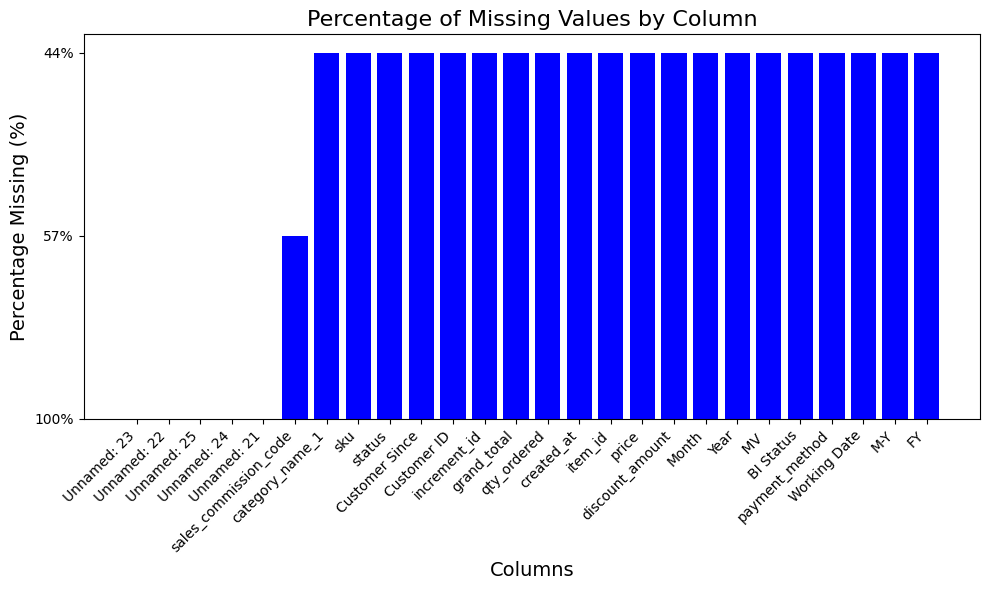

In [ ]:
# Lọc các cột có giá trị bị thiếu > 0 để trực quan hóa
missing_data_filtered = missing_data[missing_data['Missing Values'] > 0]

# Trực quan hóa
plt.figure(figsize=(10, 6))
plt.bar(missing_data_filtered['Columns Name'], missing_data_filtered['Percentage Missing Values'], color='blue')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage Missing (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 3.3 Xử lí giá trị trùng lặp

In [ ]:
# Kiểm tra xem có hàng bị trùng lặp không
duplicates = df.duplicated()

# Đếm tổng số hàng bị trùng lặp
total_duplicates = df.duplicated().sum()

print(f"Total number of duplicate rows in the data: {total_duplicates}")


Total number of duplicate rows in the data: 464050


In [ ]:
# DataFrame chứa các giá trị duy nhất từ các cột khác nhau
unique_status = pd.DataFrame({'unique_status': df['status'].unique()})
unique_payment_method = pd.DataFrame({'unique_payment_method': df['payment_method'].unique()})
unique_category_name_1 = pd.DataFrame({'unique_category_name_1': df['category_name_1'].unique()})
unique_bi_status = pd.DataFrame({'unique_BI_Status': df['BI Status'].unique()})

# Nối các DataFrame lại với nhau theo chiều ngang và thay NaN bằng chuỗi rỗng
merged_df = pd.concat([unique_status, unique_payment_method, unique_category_name_1, unique_bi_status], axis=1).fillna('')

# Hiển thị kết quả
merged_df


,unique_status,unique_payment_method,unique_category_name_1,unique_BI_Status
0,complete,cod,Women's Fashion,#REF!
1,canceled,ublcreditcard,Beauty & Grooming,Gross
2,order_refunded,mygateway,Soghaat,Net
3,received,customercredit,Mobiles & Tablets,Valid
4,refund,cashatdoorstep,Appliances,
5,closed,mcblite,Home & Living,
6,fraud,internetbanking,Men's Fashion,
7,holded,marketingexpense,Kids & Baby,
8,exchange,productcredit,\N,
9,pending_paypal,financesettlement,Others,


### 3.4 Làm sạch dữ liệu

#### 3.4.1 Loại bỏ các cột không cần thiết

In [ ]:
print('Shape Before Drop Columns')
df.shape

Shape Before Drop Columns


(1048575, 26)

In [ ]:
# Xóa các cột không cần thiết
df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)
print("Unnecessary columns ('Unnamed: 21, to 'Unnamed: 25') have been successfully dropped from the dataset")

Unnecessary columns ('Unnamed: 21, to 'Unnamed: 25') have been successfully dropped from the dataset


In [ ]:
# Xóa cột 'sales_commission_code' vì có hơn 50% giá trị bị thiếu, không phù hợp để điền dữ liệu do tính duy nhất của nó
df.drop('sales_commission_code', axis=1, inplace=True)
# Loại bỏ cột 'M-Y' khỏi bộ dữ liệu vì thông tin của nó đã được thể hiện trong hai cột riêng biệt 'Year' và 'Month'
df.drop('M-Y', axis=1, inplace=True)

print("Successfully dropped 'M-Y' & 'sales_commission_code' columns from the dataset")

Successfully dropped 'M-Y' & 'sales_commission_code' columns from the dataset


In [ ]:
print('Shape After Drop Columns')
df.shape

Shape After Drop Columns


(1048575, 19)

#### 3.4.2 Xử lí các giá trị bị thiếu

In [ ]:
print('Shape Before Handling Missing Values')
df.shape

Shape Before Handling Missing Values


(1048575, 19)

In [ ]:
# Kiểm tra giá trị bị thiếu
percentage_missing = (df.isnull().sum() / len(df)) * 100
percentage_missing = percentage_missing.map("{:.0f}%".format)
percentage_missing

,0
item_id,44%
status,44%
created_at,44%
sku,44%
price,44%
qty_ordered,44%
grand_total,44%
increment_id,44%
category_name_1,44%
discount_amount,44%


In [ ]:
# Dữ liệu có rất nhiều hàng chứa toàn bộ giá trị là NaN nên cần phải loại bỏ
df.tail(8)


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,FY,Customer ID
1048567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Xóa những hàng mà tất cả các giá trị đều là NaN
df.dropna(how='all', inplace=True)
print("Rows with all values NaN have been successfully dropped from the dataset")


Rows with all values NaN have been successfully dropped from the dataset


In [ ]:
# Kkiểm tra lại các giá trị bị thiếu
df.isnull().sum()


,0
item_id,0
status,15
created_at,0
sku,20
price,0
qty_ordered,0
grand_total,0
increment_id,0
category_name_1,164
discount_amount,0


In [ ]:
# Điền giá trị bị thiếu trong các cột 'status', 'category_name_1', và 'Customer Since' bằng giá trị mode của từng cột
# vì các cột này chứa dữ liệu phân loại (categorical)
df['status'].fillna(df['status'].mode()[0], inplace=True)
df['category_name_1'].fillna(df['category_name_1'].mode()[0], inplace=True)
df['Customer Since'].fillna(df['Customer Since'].mode()[0], inplace=True)

# Xóa các hàng có giá trị bị thiếu ở cột 'sku' hoặc 'Customer ID'
# vì 'sku' và 'Customer ID' là duy nhất (unique)
df.dropna(subset=['sku', 'Customer ID'], inplace=True)

print("Missing values filled for 'status', 'category_name_1', and 'Customer Since'.")
print()
print("Rows with missing values in 'sku' or 'Customer ID' have been dropped.")

Missing values filled for 'status', 'category_name_1', and 'Customer Since'.

Rows with missing values in 'sku' or 'Customer ID' have been dropped.


In [ ]:
# Xử lý thành công các giá trị bị thiếu
df.isnull().sum()


,0
item_id,0
status,0
created_at,0
sku,0
price,0
qty_ordered,0
grand_total,0
increment_id,0
category_name_1,0
discount_amount,0


In [ ]:
print('Shape After Handling Missing Values')
df.shape

Shape After Handling Missing Values


(584493, 19)

#### 3.4.3 Loại bỏ sự không nhất quán của dữ liệu

In [ ]:
# Xóa 'FY' khỏi tên cột FY và thay bằng '20'
df['FY'] = df['FY'].str.replace('FY', '20', regex=True)

# Xóa dấu phẩy trong cột MV
df[' MV '] = df[' MV '].str.replace(',', '', regex=True)

# Xóa ký tự # và ! trong cột BI Status
df['BI Status'] = df['BI Status'].replace('#', '', regex=True).replace('!', '', regex=True)

print('remove inconsistency from column completed successfully')

remove inconsistency from column completed successfully


In [ ]:
# Đổi tên các cột thành tên có ý nghĩa hơn
df.rename(columns={
    ' MV ': 'market_value',
    'FY': 'fiscal_year',
    'Year': 'year',
    'Month': 'month',
    'sku': 'stock_keeping_unit',
    'Customer Since': 'customer_since',
    'Customer ID': 'customer_id',
    'category_name_1': 'category_name',
    'BI Status': 'bi_status',
    'Working Date': 'working_date'
}, inplace=True)

print("Rename columns successfully")

Rename columns successfully


In [ ]:
# Dữ liệu của chúng ta có chứa \N nên thay thế '\N' bằng NaN và điền các hàng chứa giá trị NaN
df.replace('\\N', pd.NA, inplace=True)  # Dữ liệu chứa \N, nhưng cần viết là \\N để tránh lỗi
df['category_name']= df['category_name'].fillna(df['category_name'].mode()[0]) # chỉ có hai cột chứa \N
df['status']= df['status'].fillna(df['status'].mode()[0])

print('Handle \\N Successfullyl')

Handle \N Successfullyl


### 3.5 Chuyển đổi kiểu dữ liệu

In [ ]:
# Kiểm tra kiểu dữ liệu của các cột
df.dtypes


,0
item_id,float64
status,object
created_at,object
stock_keeping_unit,object
price,float64
qty_ordered,float64
grand_total,float64
increment_id,object
category_name,object
discount_amount,float64


In [ ]:
# Chuyển đổi kiểu datetime và xử lý giá trị thiếu nếu xuất hiện (errors='coerce')

# Chuyển thành kiểu dữ liệu Datetime
df['working_date'] = pd.to_datetime(df['created_at'], errors='coerce')
df['created_at'] = pd.to_datetime(df['customer_since'], errors='coerce')
df['customer_since'] = pd.to_datetime(df['customer_since'], errors='coerce')

# Điền NaN nếu xuất hiện trong các cột datetime bằng giá trị mode tương ứng
date_columns = ['working_date', 'created_at', 'customer_since']  # Xác định các cột
for col in date_columns:
    mode_value = df[col].mode()[0]  # Lấy giá trị mode của cột
    df[col].fillna(mode_value, inplace=True)

print("Datetime conversion and missing values handling completed successfully")

Datetime conversion and missing values handling completed successfully


In [ ]:
# Chuyển đổi kiểu dữ liệu phân loại (Categorical)

# Chuyển các cột được chỉ định sang kiểu dữ liệu category
categorical_columns = ['status', 'payment_method', 'category_name', 'bi_status', 'stock_keeping_unit']
df[categorical_columns] = df[categorical_columns].astype('category')

print("category type conversion process completed successfully")


category type conversion process completed successfully


In [ ]:
# Chuyển đổi kiểu số và xử lý giá trị thiếu nếu xuất hiện (errors='coerce')

# Chuyển 'increment_id' sang kiểu số và ép các giá trị không hợp lệ thành NaN
# (Các giá trị không hợp lệ như chuỗi sẽ bị thay bằng NaN nhờ errors='coerce')
df['increment_id'] = pd.to_numeric(df['increment_id'], errors='coerce')

# Xóa các hàng mà 'increment_id' là NaN
df.dropna(subset=['increment_id'], inplace=True)
# Chuyển cột sang kiểu số nguyên sau khi đã xóa NaN
df['increment_id'] = df['increment_id'].astype(int)

# Chuyển cột price sang kiểu int
df['price']= pd.to_numeric(df['price'], errors='coerce')
df['price']= df['price'].fillna(df['price'].mean()).astype(int)

# Chuyển cột qty_ordered sang kiểu int
df['qty_ordered'] = pd.to_numeric(df['qty_ordered'], errors='coerce')
df['qty_ordered']= df['qty_ordered'].fillna(df['qty_ordered'].median()).astype(int)

# Chuyển cột customer_id sang kiểu int
df['customer_id'] = pd.to_numeric(df['customer_id'], errors='coerce')
df.dropna(subset=['customer_id'], inplace=True)
df['customer_id'] = df['customer_id'].astype(int)

# Chuyển cột grand_total sang kiểu int
df['grand_total']= pd.to_numeric(df['grand_total'], errors='coerce')
df['grand_total']= df['grand_total'].fillna(df['grand_total'].median()).astype(int)

# Chuyển cột item_id sang kiểu int
df['item_id'] = pd.to_numeric(df['item_id'], errors='coerce')
df.dropna(subset=['item_id'], inplace=True)
df['item_id'] = df['item_id'].astype(int)

# Chuyển cột market_value sang kiểu int
df['market_value'] = pd.to_numeric(df['market_value'], errors='coerce')
df['market_value']= df['market_value'].fillna(df['market_value'].mean()).astype(int)

# Chuyển cột discount_amount sang kiểu int
df['discount_amount'] = pd.to_numeric(df['discount_amount'], errors='coerce')
df['discount_amount']= df['discount_amount'].fillna(df['discount_amount'].median()).astype(int)

# Chuyển cột year sang kiểu int
df['year']= df['year'].astype(int)

# Chuyển cột month sang kiểu int
df['month']= df['month'].astype(int)

# Chuyển cột fiscal_year sang kiểu int
df['fiscal_year']= df['fiscal_year'].astype(int)

print("int type conversion and handle missing values if appears process completed successfully")

int type conversion and handle missing values if appears process completed successfully


In [ ]:
# Kiểm tra dữ liệu sau chuyển đổi
df.dtypes

,0
item_id,int64
status,category
created_at,datetime64[ns]
stock_keeping_unit,category
price,int64
qty_ordered,int64
grand_total,int64
increment_id,int64
category_name,category
discount_amount,int64


### 3.6 Kiểm tra và xử lý các hàng bị trùng lặp


In [ ]:
# Kiểm tra xem có hàng bị trùng lặp không
duplicates = df.duplicated()

# Đếm tổng số hàng bị trùng lặp
total_duplicates = df.duplicated().sum()

print(f"Total number of duplicate rows in the data: {total_duplicates}")

Total number of duplicate rows in the data: 0


### 3.7 Xử lí giá trị ngoại lai (Outliers)

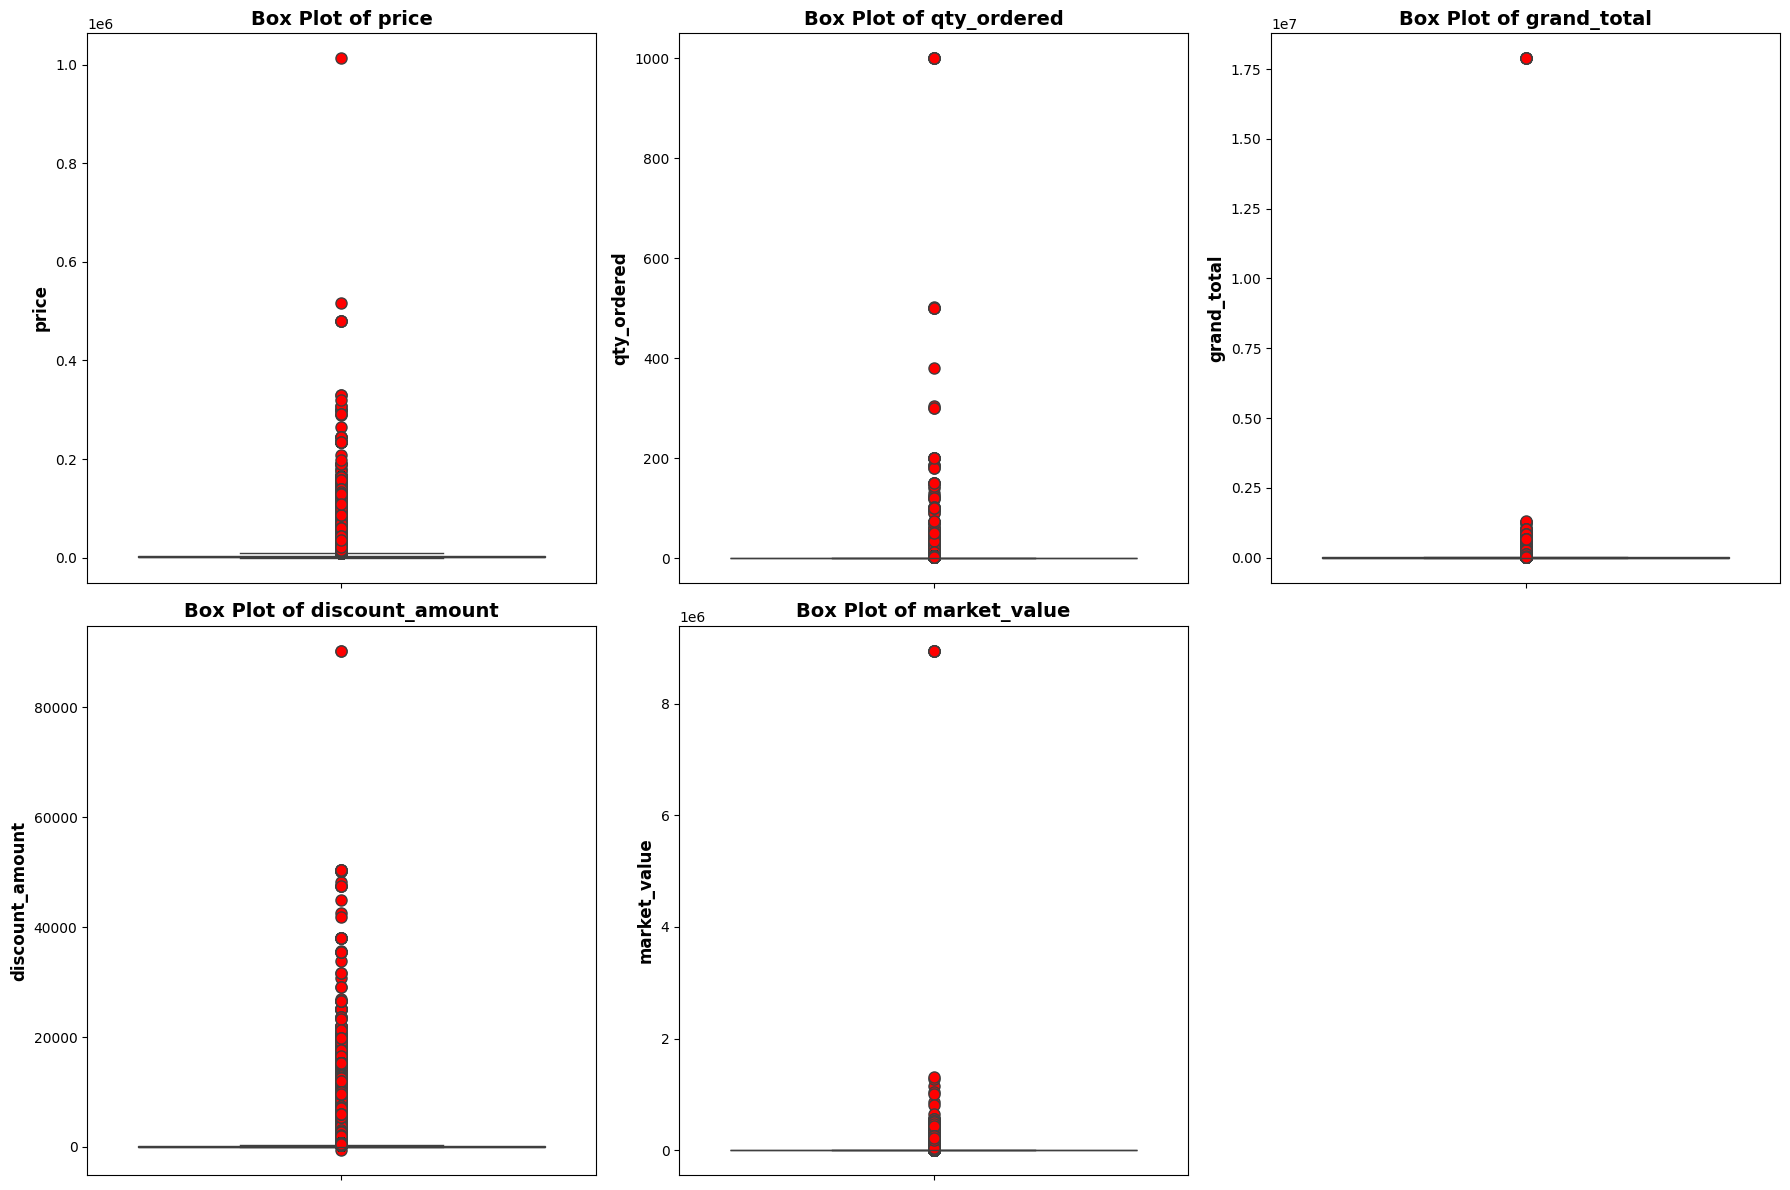

In [ ]:
# Đặt kích thước cho toàn bộ biểu đồ
plt.figure(figsize=(18, 12))

# Danh sách các cột sẽ vẽ biểu đồ
columns_to_plot = ['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']

# Lặp qua từng cột và tạo subplot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Tạo subplot với 2 hàng và 3 cột
    sns.boxplot(data=df, y=column, flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'red'})  # Biểu đồ hộp
    plt.title(f'Box Plot of {column}', fontsize=14, fontweight='bold')
    plt.ylabel(column, fontsize=12, fontweight='bold')

# Điều chỉnh bố cục để tránh chồng lấn
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


#### 3.7.1 Tính số lượng outliers trong từng cột riêng biệt

In [ ]:
# Hàm tìm outliers sử dụng phương pháp IQR
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Hàm tìm outliers sử dụng phương pháp Z-score
def find_outliers_zscore(data, column):
    z_scores = stats.zscore(data[column])
    abs_z_scores = np.abs(z_scores)
    outliers = data[abs_z_scores > 3]
    return outliers

# Tìm outliers bằng phương pháp IQR
iqr_outliers = find_outliers_iqr(df, 'price')
print(f'IQR Method: Found {iqr_outliers.shape[0]} outliers in "price" column\n')

# Tìm outliers bằng phương pháp Z-score
zscore_outliers = find_outliers_zscore(df, 'price')
print(f'Z-score Method: Found {zscore_outliers.shape[0]} outliers in "price" column')


IQR Method: Found 105683 outliers in "price" column

Z-score Method: Found 14503 outliers in "price" column


#### 3.7.2 Tính toán Outliners trông toàn bộ dữ liệu

In [ ]:
# outliers sử dụng phương pháp z-score
z = np.abs(stats.zscore(df[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']]))
outliers = (z > 3).sum()
print(f"There are total {outliers.sum()} outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using Z-score method \n")

# outliers sử dụng phương pháp IQR
Q1 = df[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']].quantile(0.25)
Q3 = df[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']] < (Q1 - 1.5 * IQR)) | (df[['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value']] > (Q3 + 1.5 * IQR))
print(f"There are total {outliers.sum().sum()} outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using IQR method")


There are total 32030 outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using Z-score method 

There are total 474045 outliers in 'price', 'qty_ordered', 'grand_total', 'discount_amount' & 'market_value' columns using IQR method


In [ ]:
# Xem dữ liệu sau khi đã làm sạch
df.sample(10, random_state=42)


,item_id,status,created_at,stock_keeping_unit,price,qty_ordered,grand_total,increment_id,category_name,discount_amount,payment_method,working_date,bi_status,market_value,year,month,customer_since,fiscal_year,customer_id
168651,424085,complete,2016-08-01,Lala_USS17-LAC-010A,950,1,1900,100280550,Women's Fashion,0,cod,2017-03-18,Net,950,2017,3,2016-08-01,2017,2478
410446,707223,complete,2017-12-01,MATIDR59BA5107902DF,6700,1,6700,100432437,Mobiles & Tablets,0,cod,2017-12-03,Net,6700,2017,12,2017-12-01,2018,82217
135209,380797,complete,2016-11-01,Kashmina_ST-MX-PK,675,1,1374,100256293,Women's Fashion,0,jazzvoucher,2017-01-03,Net,675,2017,1,2016-11-01,2017,19405
526370,841067,canceled,2017-07-01,ENTECO5A0C00E345122,20399,1,18335,100523157,Entertainment,2063,jazzvoucher,2018-05-08,Gross,20399,2018,5,2017-07-01,2018,55517
32215,251048,canceled,2016-09-01,Haier_Esteem V4,17999,1,16199,100174744,Mobiles & Tablets,1799,Payaxis,2016-09-30,Gross,17999,2016,9,2016-09-01,2017,8475
92892,326035,complete,2016-09-01,Bold_Bold-EPIC,195,1,390,100223975,Beauty & Grooming,0,cod,2016-11-25,Net,195,2016,11,2016-09-01,2017,9218
448023,750112,canceled,2018-02-01,OTHPCB5A7D845FA58AB,6000,1,6000,100456457,Others,0,jazzwallet,2018-02-17,Gross,6000,2018,2,2018-02-01,2018,89057
470908,776081,order_refunded,2018-03-01,COMCOO59ACF60D05659,2564,1,2564,100473925,Computing,0,cod,2018-03-08,Valid,2564,2018,3,2018-03-01,2018,93600
83536,314508,complete,2016-11-01,NVC_EE Power Bank 2600 mah,410,1,287,100216744,Mobiles & Tablets,123,jazzvoucher,2016-11-24,Net,410,2016,11,2016-11-01,2017,19595
419712,718263,canceled,2017-12-01,MATSAM59B7EAE1D2916,28351,2,56702,100438391,Mobiles & Tablets,0,Easypay,2017-12-18,Gross,56702,2017,12,2017-12-01,2018,83621


### 3.8 Tạo các đặc trưng (features) mới cho dữ liệu


In [ ]:
# Giá trị đơn hàng trên mỗi sản phẩm
df['price_per_unit'] = df['price'] / df['qty_ordered']

# Tỷ lệ phần trăm chiết khấu
df['discount_percentage'] = (df['discount_amount'] / df['price']) * 100
df['discount_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['discount_percentage'].fillna(0, inplace=True)

# Thời gian khách hàng đã gắn bó (tính bằng ngày)
df['customer_tenure_days'] = (df['created_at'] - df['customer_since']).dt.days

# Tạo từ điển ánh xạ số tháng sang tên tháng
month_name_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
# Tạo cột mới 'month_name' bằng cách ánh xạ từ cột 'month'
df['month_name'] = df['month'].map(month_name_mapping)

print("4 New features created successfully")


4 New features created successfully


### 3.9 Mức độ tương quan của các biến số trong dữ liệu

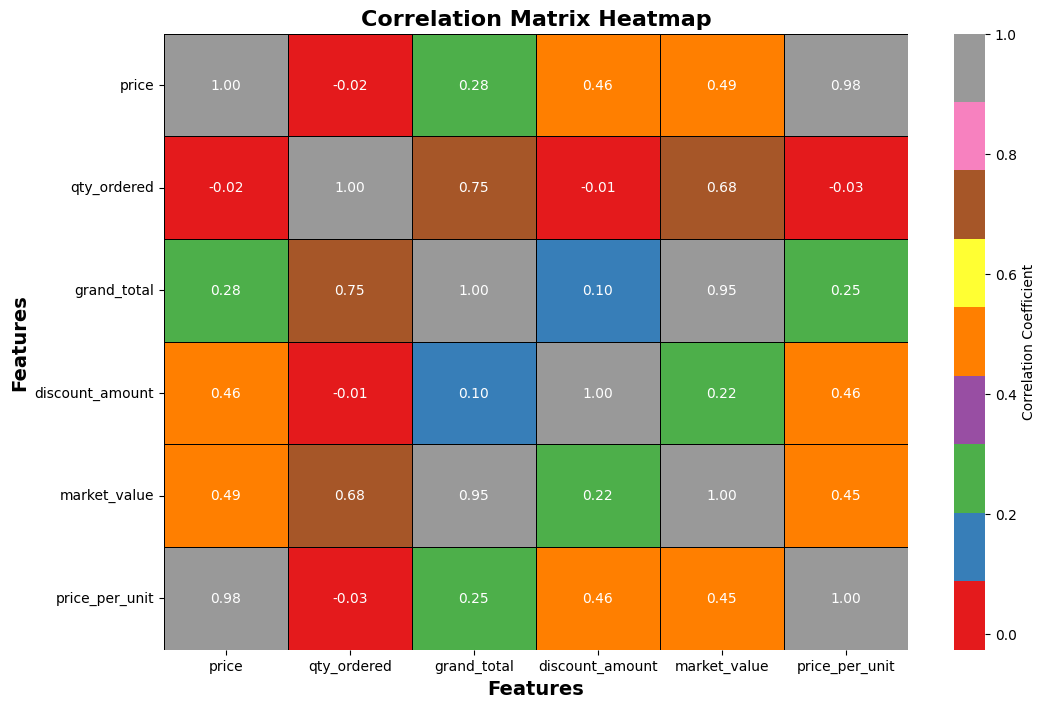

In [ ]:
# Chọn các cột để tính ma trận tương quan
columns_for_correlation = ['price', 'qty_ordered', 'grand_total', 'discount_amount', 'market_value', 'price_per_unit']

# Tính ma trận tương quan
correlation_matrix = df[columns_for_correlation].corr()

# Đặt kích thước biểu đồ
plt.figure(figsize=(12, 8))

# Tạo heatmap với các tùy chỉnh
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Set1", linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlation Coefficient'})

# Thêm tiêu đề và nhãn
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')


# Hiển thị biểu đồ
plt.show()


## 4. EDA - Phân tích dữ liệu thăm dò

### 4.1 Phân tích xu hướng doanh thu theo thời gian

#### 4.1.1 Phân tích Doanh thi và Số lượng đơn hàng theo thời gian

#### **Câu hỏi: Doanh thu và số đơn hàng thay đổi như thế nào qua các tháng và các năm?**

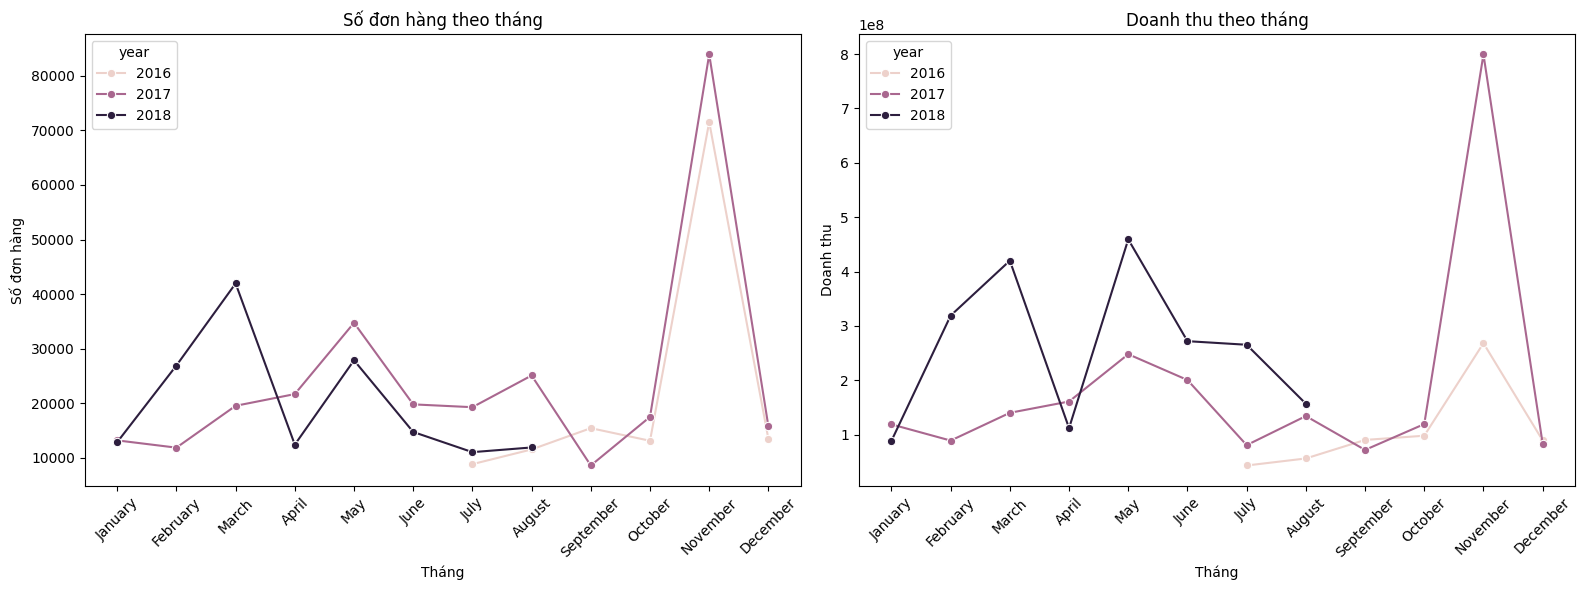

In [ ]:
# Chuyển đổi định dạng ngày tháng
df['created_at'] = pd.to_datetime(df['created_at'])

# Nhóm dữ liệu theo năm và tên tháng
monthly_trend = df.groupby(['year', 'month_name']).agg({
    'item_id': 'count',
    'grand_total': 'sum'
}).reset_index().rename(columns={'item_id': 'order_count'})

# Sắp xếp thứ tự tháng
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month_name'] = pd.Categorical(monthly_trend['month_name'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values(['year', 'month_name'])

# Tạo biểu đồ
plt.figure(figsize=(16, 6))

# Biểu đồ số đơn hàng theo tháng
plt.subplot(1, 2, 1)
sns.lineplot(data=monthly_trend, x='month_name', y='order_count', hue='year', marker='o')
plt.title('Số đơn hàng theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số đơn hàng')
plt.xticks(rotation=45)

# Biểu đồ doanh thu theo tháng
plt.subplot(1, 2, 2)
sns.lineplot(data=monthly_trend, x='month_name', y='grand_total', hue='year', marker='o')
plt.title('Doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Xu hướng Số đơn hàng**

- Có sự tăng trưởng theo mùa, đặc biệt vào các tháng như Tháng 6, Tháng 11 và Tháng 12, thường là mùa mua sắm (giảm giá giữa năm và cuối năm).

- Một số tháng như Tháng 1 và Tháng 2 có đơn hàng thấp hơn, có thể do sau kỳ nghỉ Tết hoặc đầu năm tài chính.

**Xu hướng Doanh thu**

- Doanh thu cũng phản ánh xu hướng tương tự như số đơn hàng, với các đỉnh vào cuối năm và giữa năm.

- Tuy nhiên, một số năm có doanh thu cao hơn mặc dù số đơn hàng không tăng tương ứng — điều này cho thấy có thể là do khách hàng mua sản phẩm giá trị cao hơn.

### 4.2 Phân tích xu hướng theo Danh mục Sản phẩm

#### 4.2.1 Phân tích Danh mục sản phẩm theo số lượng đơn hàng

#### **Câu hỏi: Danh mục sản phẩm bán chạy nhất?**

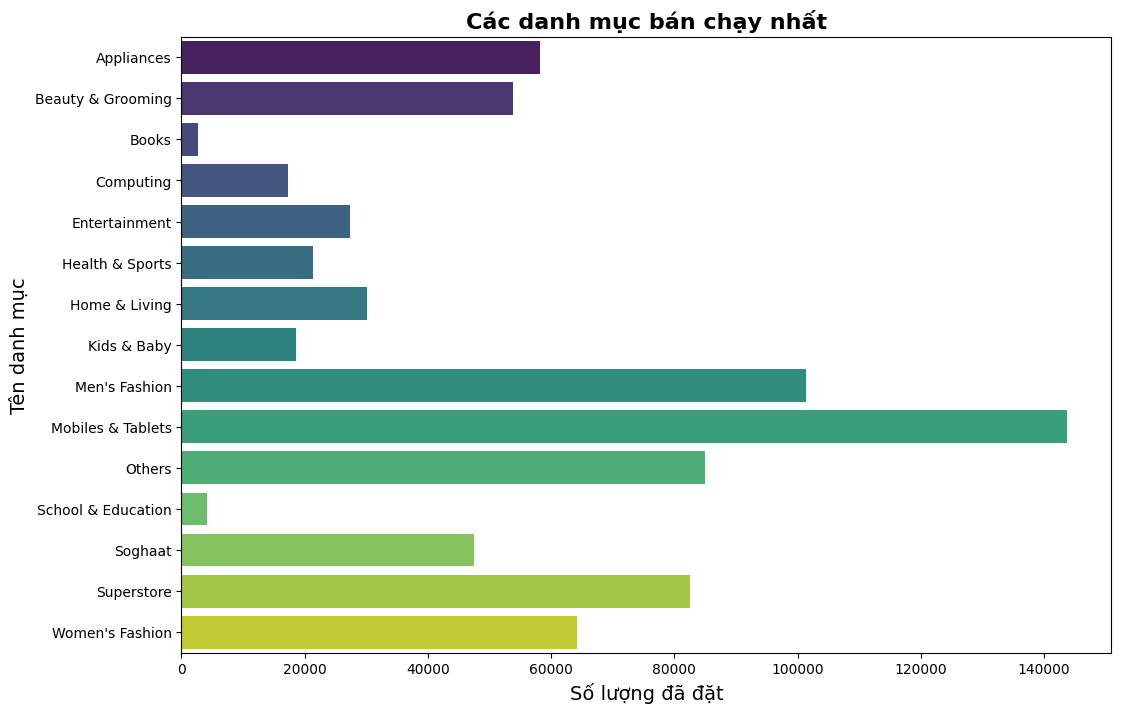

In [ ]:
# Nhóm theo category_name và tính tổng số lượng đã đặt
category_sales = df.groupby('category_name')['qty_ordered'].sum().reset_index()

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12, 8))
sns.barplot(x='qty_ordered', y='category_name', data=category_sales, palette='viridis')
plt.title('Các danh mục bán chạy nhất', fontsize=16, fontweight='bold')
plt.xlabel('Số lượng đã đặt', fontsize=14)
plt.ylabel('Tên danh mục', fontsize=14)
plt.show()


- Các danh mục như "Mobiles & Tablets" và "Men's Fashion" cho thấy hiệu suất vượt trội, có khả năng là những động lực tăng trưởng doanh thu chính. Việc tập trung vào các mặt hàng công nghệ và thời trang nam dường như đang mang lại kết quả tốt.

- Vì vậy hãy tập trung kho hàng và quảng cáo cho nhóm sản phẩm top đầu.

#### 4.2.2 Phân tích Danh mục sản phẩm theo doanh thu và chiết khấu

#### **Câu hỏi: Chiến dịch giảm giá nào hiệu quả nhất theo danh mục?**

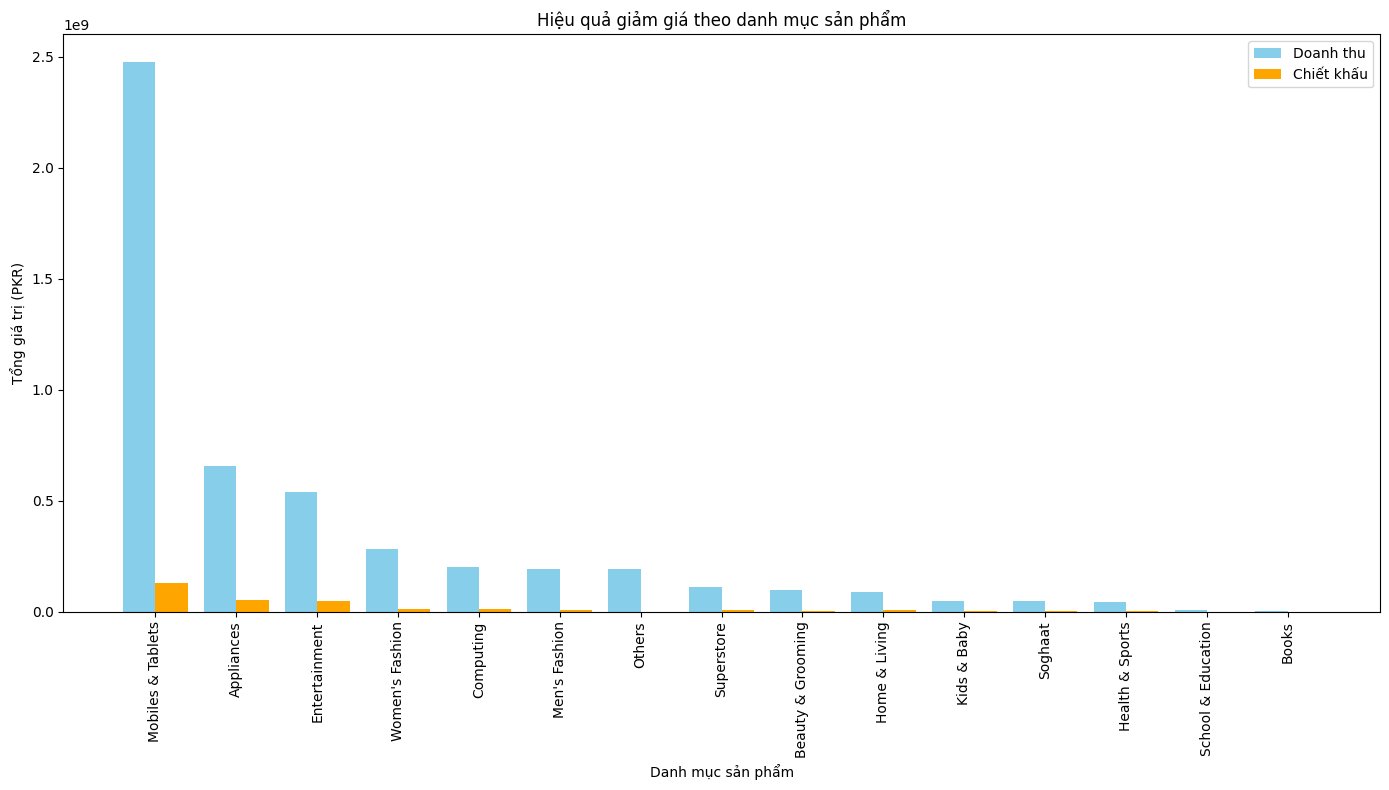

In [ ]:
# Nhóm theo danh mục sản phẩm
discount_analysis = df.groupby('category_name').agg({
    'grand_total': 'sum',
    'discount_amount': 'sum'
}).reset_index()

# Chỉ giữ lại những danh mục có doanh thu đáng kể (lọc nhiễu)
discount_analysis = discount_analysis[discount_analysis['grand_total'] > 100000]

# Sắp xếp theo tổng doanh thu
discount_analysis = discount_analysis.sort_values(by='grand_total', ascending=False)

# Thiết lập kích thước và màu sắc
plt.figure(figsize=(14, 8))
bar_width = 0.4
x = range(len(discount_analysis))

# Vẽ cột doanh thu
plt.bar(x, discount_analysis['grand_total'], width=bar_width, label='Doanh thu', color='skyblue')

# Vẽ cột chiết khấu (chồng lên)
plt.bar([i + bar_width for i in x], discount_analysis['discount_amount'], width=bar_width, label='Chiết khấu', color='orange')

# Gán nhãn
plt.xlabel('Danh mục sản phẩm')
plt.ylabel('Tổng giá trị (PKR)')
plt.title('Hiệu quả giảm giá theo danh mục sản phẩm')
plt.xticks([i + bar_width / 2 for i in x], discount_analysis['category_name'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Dựa trên số liệu về tổng doanh thu được tạo ra trong kỳ có áp dụng chiết khấu, danh mục **Mobiles & Tablets** thể hiện "hiệu quả" cao nhất về mặt tạo ra tổng doanh thu lớn nhất đi kèm với mức chiết khấu cao nhất. Các danh mục **Appliances và Entertainment** xếp sau.

Tuy nhiên, cần phân tích sâu hơn để đánh giá hiệu quả thực sự về mặt lợi nhuận hoặc hiệu quả sử dụng ngân sách chiết khấu.

### 4.3 Phân tích Phương thức Thanh toán

#### 4.3.1 Phân tích Phương thức thanh toán theo tần suất sử dụng

#### **Câu hỏi: Phương thức thanh toán ưa thích nhất (phổ biến nhất) của khách hàng là gì ?**

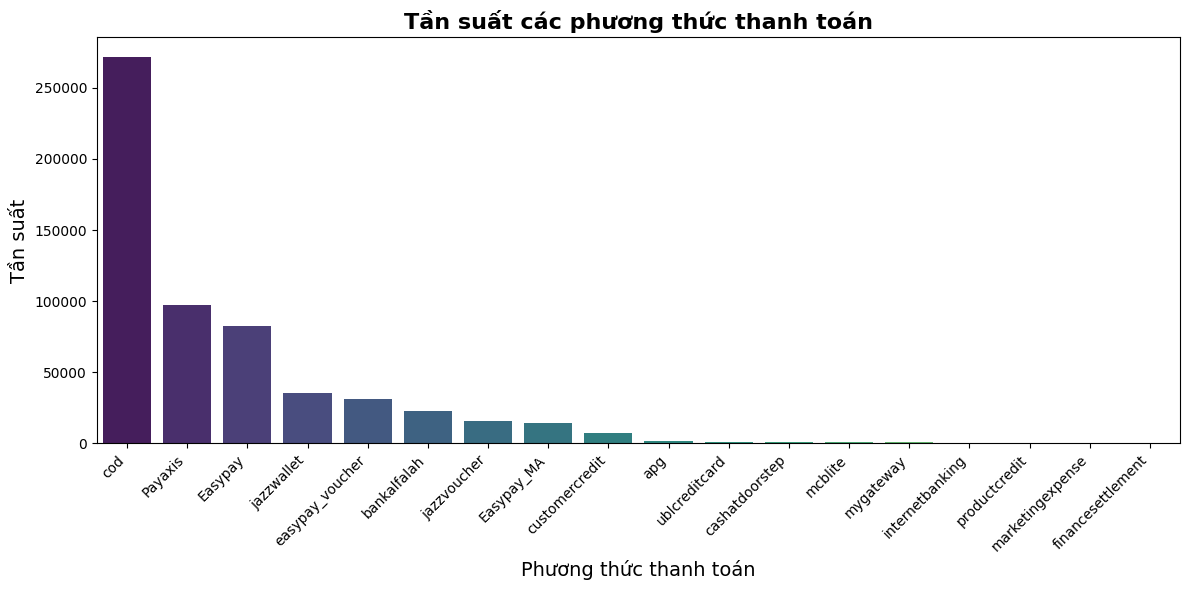

In [ ]:
# Trực quan hóa tần suất các phương thức thanh toán
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='payment_method', palette='viridis', order=df['payment_method'].value_counts().index)
plt.title('Tần suất các phương thức thanh toán', fontsize=16, fontweight='bold')
plt.xlabel('Phương thức thanh toán', fontsize=14)
plt.ylabel('Tần suất', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



- Dựa trên biểu đồ "**Tần suất các phương thức thanh toán**", phương thức thanh toán được ưa thích nhất (phổ biến nhất) của khách hàng là "**cod**" (Cash on Delivery - Thanh toán khi nhận hàng).

-  **Sự thống trị của COD**: Biểu đồ cho thấy sự ưa chuộng áp đảo của phương thức thanh toán khi nhận hàng (COD). Điều này có thể phản ánh một số yếu tố như sự tin tưởng của khách hàng (họ muốn kiểm tra hàng trước khi trả tiền), thói quen mua sắm, hoặc hạn chế trong việc tiếp cận/sử dụng các phương thức thanh toán kỹ thuật số.
- **Tiềm năng của thanh toán số**: Mặc dù COD chiếm ưu thế lớn, sự hiện diện và tần suất sử dụng của một số ví điện tử/cổng thanh toán như Payaxis, Easypay, Jazzwallet cho thấy xu hướng sử dụng thanh toán kỹ thuật số đang hình thành và có tiềm năng phát triển.
- **Đa dạng nhưng thiếu tập trung**: Nền tảng/thị trường này cung cấp rất nhiều lựa chọn thanh toán, nhưng phần lớn trong số đó có tần suất sử dụng rất thấp. Điều này có thể dẫn đến sự phức tạp trong quản lý mà không mang lại hiệu quả sử dụng tương xứng.
- **Ý nghĩa hoạt động**: Sự phổ biến của COD đặt ra yêu cầu cao về quy trình vận chuyển, thu tiền và quản lý dòng tiền cho doanh nghiệp.

- **Cơ hội**: Việc thúc đẩy các phương thức thanh toán không dùng tiền mặt (ví dụ: thông qua ưu đãi, tăng cường sự tin cậy, đơn giản hóa quy trình) có thể giúp giảm chi phí vận hành liên quan đến COD và khuyến khích hành vi mua sắm trực tuyến liền mạch hơn.

#### 4.3.2 Phân tích Phương thức thanh toán theo giá trị đơn hàng

#### **Câu hỏi: Giá trị đơn hàng có khác nhau theo phương thức thanh toán không?**

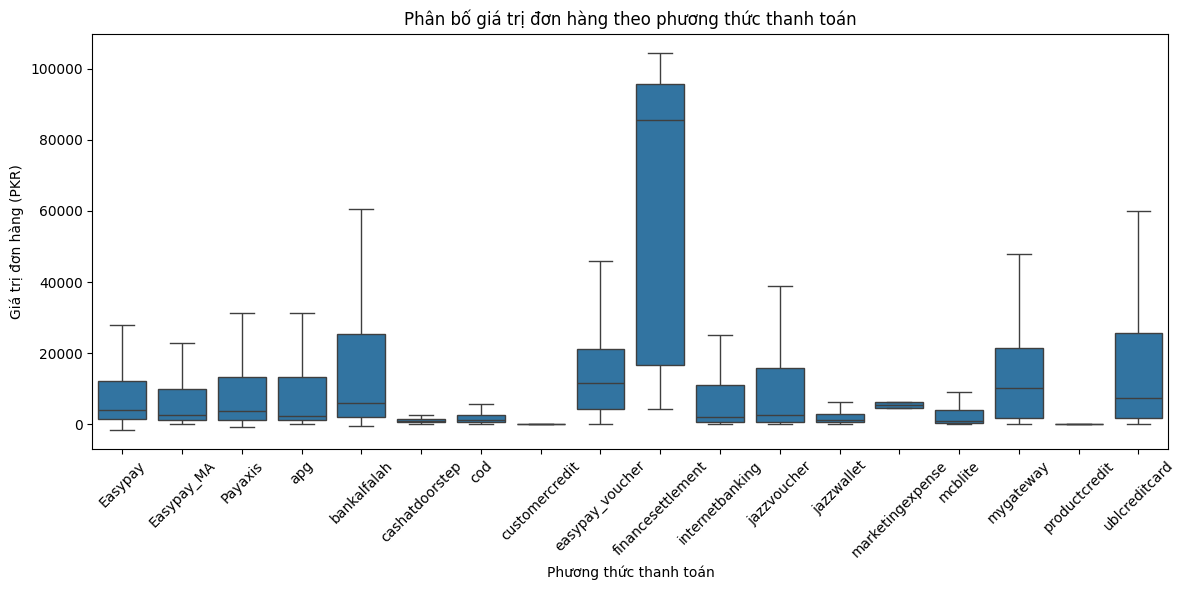

Thống kê giá trị đơn hàng theo phương thức thanh toán:

                    min       max   mean   count
payment_method                                  
financesettlement  4212    389459 101645      15
mygateway             1   1155966  31796     669
bankalfalah        -340   1028751  29841   23065
ublcreditcard         1   1279980  24883     882
easypay_voucher       0    396832  17991   31176
jazzvoucher           0  17888000  16112   15633
apg                   2    506847  15396    1758
internetbanking       1    535400  15292     472
mcblite               1   1280473  11780     723
Payaxis            -873    599599  11671   97640
Easypay           -1594    888065  11052   82896
Easypay_MA            0   1315875   7764   14027
cashatdoorstep        8   1039479   6302     732
marketingexpense   1260     16200   5845      45
jazzwallet            0  17888000   4627   35145
cod                   0    112149   3918  271926
customercredit        0     59700     17    7555
productcredit

In [ ]:
# Vẽ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='payment_method', y='grand_total', showfliers=False)
plt.title("Phân bố giá trị đơn hàng theo phương thức thanh toán")
plt.xlabel("Phương thức thanh toán")
plt.ylabel("Giá trị đơn hàng (PKR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# In ra giá trị thấp nhất và cao nhất theo từng phương thức thanh toán
summary = df.groupby('payment_method')['grand_total'].agg(['min', 'max', 'mean', 'count']).sort_values(by='mean', ascending=False)
print("Thống kê giá trị đơn hàng theo phương thức thanh toán:\n")
print(summary)

- **COD**: Phổ biến số 1, nhưng giá trị đơn hàng thấp: COD là phương thức được khách hàng sử dụng nhiều nhất, nhưng lại đi kèm với giá trị đơn hàng trung bình thấp nhất trong số các phương thức thanh toán cho đơn hàng thực tế. Điều này cho thấy khách hàng có xu hướng sử dụng COD cho các giao dịch giá trị nhỏ, có thể vì sự tiện lợi hoặc tâm lý muốn kiểm tra hàng trước khi trả tiền đối với các đơn hàng ít rủi ro hơn về mặt giá trị.

- **Thanh toán điện tử**: Ít phổ biến hơn, nhưng giá trị đơn hàng cao hơn: Các phương thức thanh toán điện tử/trực tuyến có tần suất sử dụng thấp hơn nhiều so với COD, nhưng lại được sử dụng cho các đơn hàng có giá trị trung bình cao hơn đáng kể. Điều này gợi ý rằng khách hàng sẵn sàng sử dụng thanh toán trực tuyến cho các đơn hàng giá trị lớn hơn, có thể vì sự tiện lợi khi giao dịch số tiền lớn, hoặc họ có mức độ tin cậy cao hơn khi mua các mặt hàng đắt tiền.
- **Cơ hội thúc đẩy giá trị đơn hàng qua thanh toán điện tử**: Để tăng doanh thu trung bình trên mỗi giao dịch, doanh nghiệp có thể tập trung khuyến khích khách hàng sử dụng các phương thức thanh toán điện tử, đặc biệt là các phương thức có giá trị trung bình cao như easypay_voucher, ublcreditcard, mygateway, bankalfalah. Các chiến dịch khuyến mãi cho đơn hàng giá trị cao khi thanh toán bằng các phương thức này có thể hiệu quả.
- **Quản lý rủi ro và chi phí COD**: Tỷ lệ lớn giao dịch giá trị thấp qua COD có thể làm tăng chi phí logistics (phí thu hộ, tỷ lệ hoàn hàng). Việc tìm cách chuyển đổi một phần giao dịch COD sang thanh toán điện tử (dù là các giao dịch nhỏ) có thể giúp tối ưu chi phí hoạt động.
- **Lưu ý về dữ liệu đặc biệt**: Cần xử lý hoặc phân tích riêng các "phương thức" như financesettlement, customercredit, productcredit vì chúng không đại diện cho hành vi thanh toán mua hàng thông thường của đa số khách hàng cá nhân. Các giá trị âm cần được điều tra để hiểu rõ chúng có phải là hoàn tiền hay không và ảnh hưởng thế nào đến số liệu trung bình.

Tóm lại, biểu đồ và dữ liệu cho thấy có sự phân hóa rõ rệt trong hành vi mua sắm dựa trên phương thức thanh toán. COD là vua về số lượng giao dịch nhưng cho đơn hàng giá trị nhỏ, trong khi thanh toán điện tử mặc dù ít được dùng hơn lại gắn liền với các giao dịch giá trị cao hơn. Điều này là thông tin quan trọng để xây dựng chiến lược kinh doanh và thanh toán phù hợp

### 4.4 Phân tích trạng thái đơn hàng

#### 4.4.1 Phân tích Trạng thái đơn hàng theo tần suất

#### **Câu hỏi: Tình hình các đơn hàng như thế nào?**

##### Để có cái nhìn tổng quan về quy trình xử lý đơn hàng, hãy cùng xem xét tần suất của các trạng thái đơn hàng như hoàn thành, đã hủy, đang xử lý, v.v.

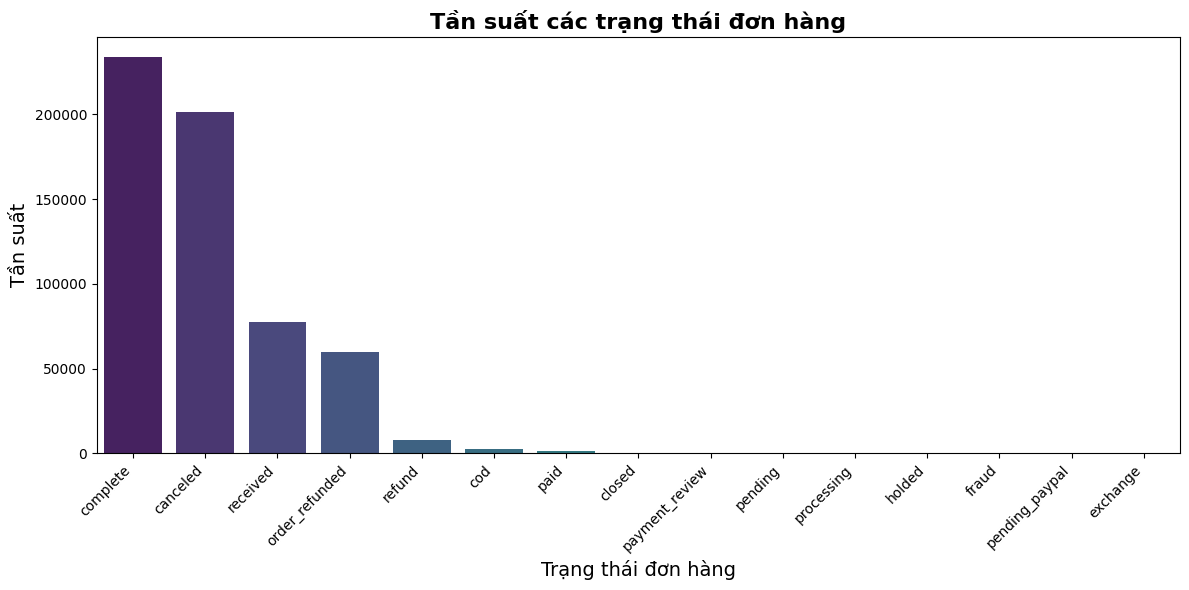

In [ ]:
# Trực quan hóa tần suất các trạng thái đơn hàng
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='status', palette='viridis', order=df['status'].value_counts().index)
plt.title('Tần suất các trạng thái đơn hàng', fontsize=16, fontweight='bold')
plt.xlabel('Trạng thái đơn hàng', fontsize=14)
plt.ylabel('Tần suất', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- **complete (Hoàn thành)**: Chiếm tần suất cao nhất, cho thấy số lượng lớn đơn hàng đã được xử lý thành công và kết thúc.
- **Tỷ lệ hủy đơn hàng cao đáng ngại**: Điểm đáng chú ý nhất từ biểu đồ là số lượng đơn hàng bị "canceled" gần tương đương với số lượng đơn hàng "complete".
- **Lượng đơn hàng bị hoàn tiền đáng kể**: Số lượng đơn hàng bị "order_refunded" và "refund" cũng khá cao.
- **Quy trình xử lý trung gian có vẻ hiệu quả**: Tần suất thấp của các trạng thái "pending", "processing", "payment_review" cho thấy hệ thống xử lý đơn hàng (sau khi nhận và trước khi hoàn thành/hủy/hoàn tiền) có vẻ hoạt động tương đối trơn tru, ít bị tắc nghẽn. Tuy nhiên, có thể vấn đề nằm ở các khâu trước hoặc sau quy trình xử lý cốt lõi này (ví dụ: lúc đặt hàng dẫn đến hủy, hoặc sau khi nhận hàng dẫn đến hoàn tiền).

- **Các vấn đề nghiêm trọng (Fraud) ở mức thấp**: Tần suất rất thấp của trạng thái "fraud" là một tín hiệu tích cực, cho thấy hệ thống kiểm soát gian lận đang hoạt động tốt hoặc tỷ lệ gian lận vốn dĩ thấp.

Số lượng đơn hàng hoàn thành là cao nhất. Tuy nhiên, tỷ lệ đơn hàng bị hủy và hoàn tiền ở mức rất cao là điểm cần đặc biệt lưu tâm. Để nâng cao hiệu quả kinh doanh và sự hài lòng của khách hàng, doanh nghiệp cần tập trung điều tra nguyên nhân gốc rễ của tỷ lệ hủy và hoàn tiền cao này, từ đó đưa ra các biện pháp cải thiện phù hợp trong quy trình bán hàng, thông tin sản phẩm, logistics, và chính sách hậu mãi. Quy trình xử lý đơn hàng ở các khâu trung gian có vẻ đang hoạt động khá hiệu quả.

#### 4.4.2 **Mối quan hệ giữa phương thức thanh toán, giá trị đơn hàng và tình trạng đơn hàng**

Mục tiêu: Xem liệu có sự khác biệt về giá trị trung bình đơn hàng giữa các phương thức thanh toán và tỷ lệ thành công/hủy đơn hàng khác nhau không.

Ý nghĩa: Giúp hiểu hành vi thanh toán của khách hàng và tìm ra phương thức dễ gây hủy đơn nhất.

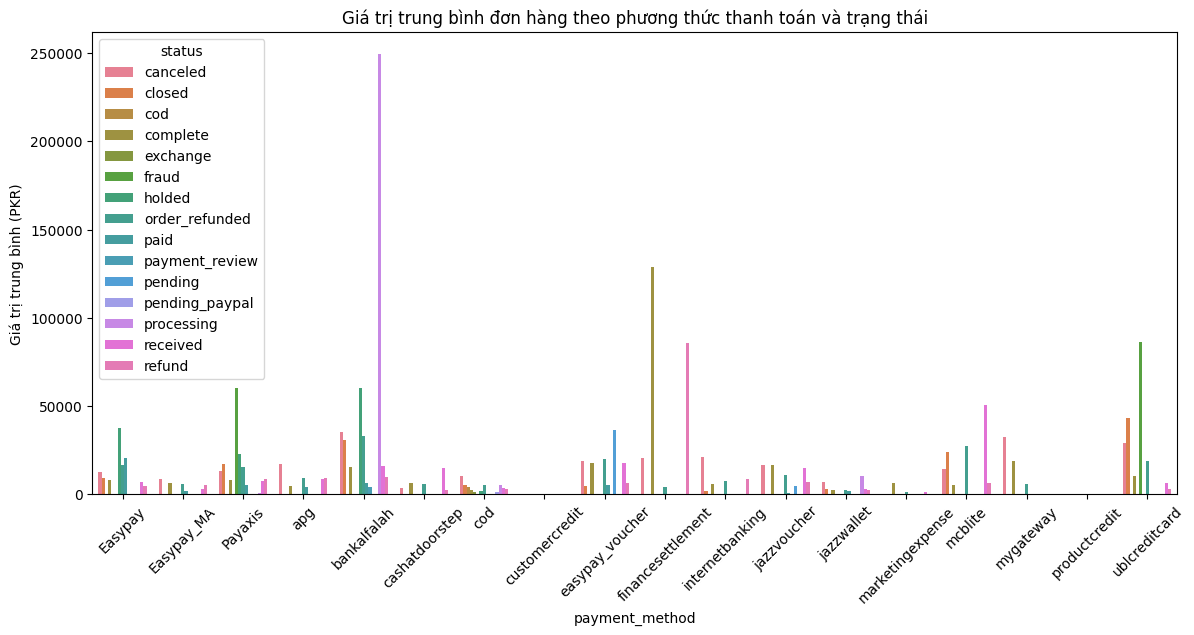

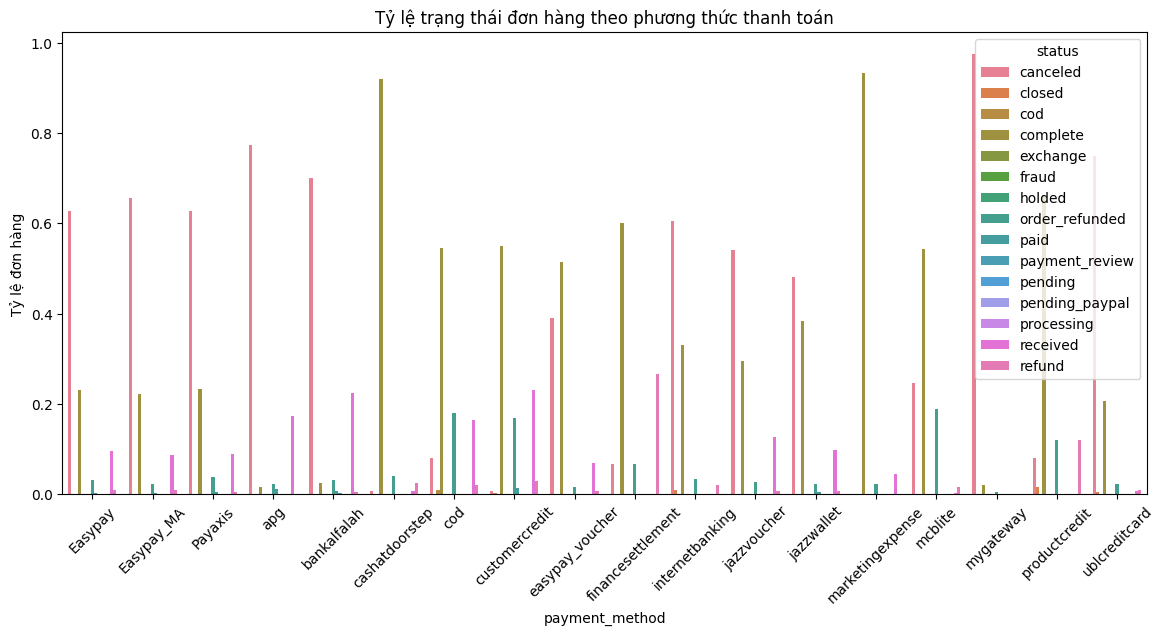

In [ ]:
# Tính giá trị trung bình và tỷ lệ trạng thái theo payment_method
payment_status = df.groupby(['payment_method', 'status']).agg({
    'grand_total': ['mean', 'count']
}).reset_index()
payment_status.columns = ['payment_method', 'status', 'avg_grand_total', 'count']

# Tổng số đơn theo payment_method để tính tỷ lệ
total_orders = df.groupby('payment_method')['item_id'].count().reset_index().rename(columns={'item_id':'total_orders'})

# Gộp để tính tỷ lệ
payment_status = payment_status.merge(total_orders, on='payment_method')
payment_status['order_ratio'] = payment_status['count'] / payment_status['total_orders']

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))

sns.barplot(data=payment_status, x='payment_method', y='avg_grand_total', hue='status')
plt.title('Giá trị trung bình đơn hàng theo phương thức thanh toán và trạng thái')
plt.ylabel('Giá trị trung bình (PKR)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=payment_status, x='payment_method', y='order_ratio', hue='status')
plt.title('Tỷ lệ trạng thái đơn hàng theo phương thức thanh toán')
plt.ylabel('Tỷ lệ đơn hàng')
plt.xticks(rotation=45)
plt.show()

**"Giá trị trung bình đơn hàng theo phương thức thanh toán và trạng thái"**

- **COD (Cash on Delivery)** có lượng đơn hàng rất lớn nhưng giá trị trung bình đơn hàng thấp hơn so với các phương thức như Credit Card hoặc Bank Transfer.

- **Các phương thức thanh toán trực tuyến** (ví dụ: Credit Card, Easypaisa) thường có giá trị đơn hàng trung bình cao hơn, đặc biệt là khi trạng thái đơn hàng là hoàn tất (complete).

Một số phương thức có tỷ lệ đơn hàng bị hủy cao, có thể là do người dùng không tin tưởng hoặc thao tác thanh toán khó khăn.

**Gợi ý chiến lược:**

- Khuyến khích khách hàng sử dụng thẻ tín dụng hoặc thanh toán online bằng cách tặng thêm điểm tích lũy hoặc chiết khấu nhỏ.

- Phân tích thêm lý do hủy đơn hàng theo phương thức để tối ưu hệ thống thanh toán.

**"Tỷ lệ trạng thái đơn hàng theo phương thức thanh toán"**

- **COD (Cash on Delivery)** có tỷ lệ đơn hàng bị hủy cao hơn đáng kể so với các phương thức khác.

- **Các phương thức thanh toán điện tử** như Bank Transfer, Easypaisa, Credit Card có tỷ lệ đơn hàng hoàn tất cao hơn, cho thấy khách hàng thanh toán trước thường cam kết mua hàng hơn.

Một số phương thức hiếm gặp có số liệu lệch hoặc ít mẫu, nên cần kiểm tra kỹ nếu dùng để ra quyết định.

**Gợi ý chiến lược:**

- Cân nhắc giới hạn COD cho các khách hàng mới hoặc đơn hàng có giá trị cao.

- Tăng cường truyền thông lợi ích và an toàn khi thanh toán trực tuyến.

- Phân tích sâu thêm theo khu vực địa lý nếu có dữ liệu, vì hành vi có thể khác nhau theo vùng miền.

### 4.5 Phân tích Khách Hàng

#### 4.5.1 Phân tích Tổng quan khách hàng về mức độ mua sắm

In [ ]:
total_customers = df['customer_id'].nunique()
print(f"Tổng số khách hàng: {total_customers}")

Tổng số khách hàng: 115323


In [ ]:
# Tính tổng chi tiêu theo từng khách hàng
customer_revenue = df.groupby('customer_id')['grand_total'].sum().sort_values(ascending=False)
# Khách hàng có giá trị cao nhất
top_customers = customer_revenue.head(10)
{
    "Top 10 khách hàng chi tiêu nhiều nhất": top_customers.to_dict()
}

{'Top 10 khách hàng chi tiêu nhiều nhất': {5032: 72150376,
  50387: 35776000,
  111057: 31338185,
  109038: 28341357,
  110215: 21969066,
  10654: 19496005,
  113694: 16531260,
  39707: 16463501,
  26527: 12502191,
  8963: 12421422}}

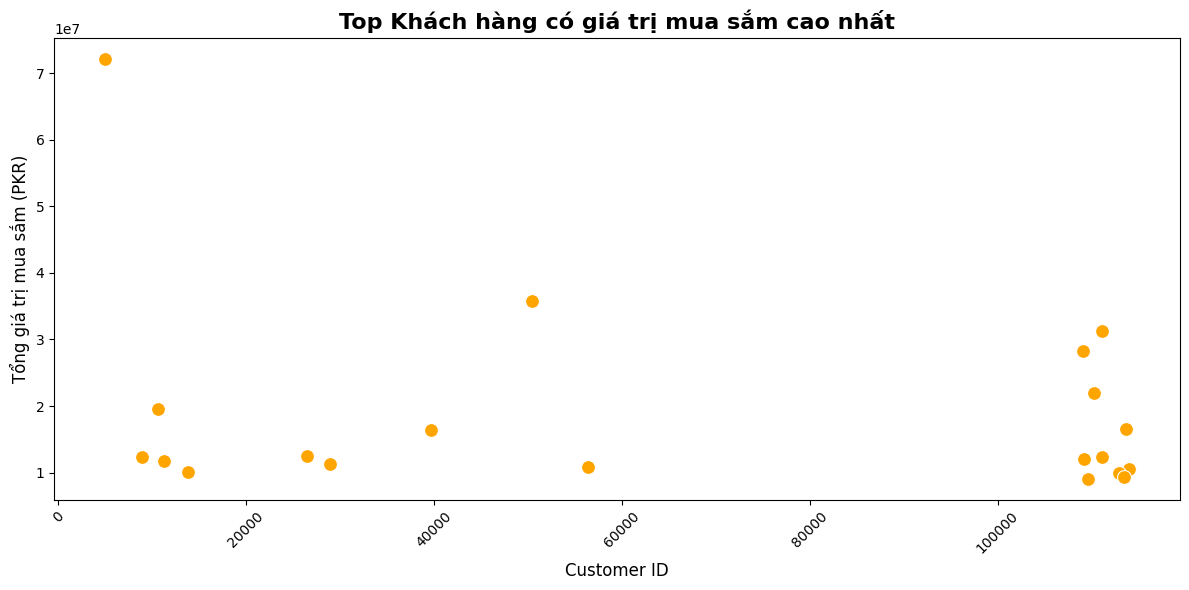

In [ ]:
# Tính tổng chi tiêu của từng khách hàng
customer_total = df.groupby('customer_id')['grand_total'].sum().reset_index()

# Sắp xếp theo giá trị mua sắm cao nhất
top_customers = customer_total.sort_values(by='grand_total', ascending=False).head(20)

# Biểu đồ scatter
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_customers, x='customer_id', y='grand_total', s=100, color='orange')
plt.title('Top Khách hàng có giá trị mua sắm cao nhất', fontsize=16, fontweight='bold')
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Tổng giá trị mua sắm (PKR)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Sự tập trung giá trị vào nhóm nhỏ**: Biểu đồ cho thấy rõ ràng rằng trong số 115323 khách hàng, có một nhóm nhỏ (các điểm ở phía trên cùng của biểu đồ) có tổng giá trị mua sắm vượt trội hơn hẳn phần lớn khách hàng còn lại (các điểm sẽ tập trung ở gần trục hoành nếu hiển thị tất cả).

- **Mức chi tiêu khổng lồ của Top Khách hàng**: Danh sách "Top 10 khách hàng chi tiêu nhiều nhất" xác nhận điều này. Khách hàng đứng đầu chi tiêu tới hơn 72 triệu PKR, và nhiều khách hàng khác trong top 10 cũng chi tiêu hàng chục triệu PKR. Mức chi tiêu này cao hơn rất nhiều lần so với giá trị đơn hàng trung bình được phân tích trước đó.

**Đánh giá:**

- **Tầm quan trọng chiến lược của khách hàng VIP**: Sự tồn tại của một nhóm khách hàng nhỏ nhưng có giá trị chi tiêu cực kỳ lớn nhấn mạnh tầm quan trọng chiến lược của phân khúc khách hàng này. Họ là những động lực doanh thu chính và việc giữ chân họ là cực kỳ quan trọng đối với sự thành công lâu dài của doanh nghiệp. Đây là minh chứng rõ ràng cho nguyên lý Pareto (quy tắc 80/20), nơi một tỷ lệ nhỏ khách hàng tạo ra phần lớn doanh thu.

- **Cơ hội cá nhân hóa và xây dựng mối quan hệ**: Việc xác định được những khách hàng này cho phép doanh nghiệp triển khai các chương trình chăm sóc khách hàng đặc biệt (VIP), ưu đãi cá nhân hóa, hoặc các dịch vụ độc quyền để tăng cường lòng trung thành và khuyến khích họ tiếp tục mua sắm.

- **Tiềm năng nhân rộng**: Phân tích sâu hơn về hành vi mua sắm (loại sản phẩm mua, tần suất, phản ứng với khuyến mãi) của nhóm khách hàng top đầu có thể giúp xác định các đặc điểm chung và từ đó xây dựng chiến lược thu hút hoặc chuyển đổi những khách hàng tiềm năng khác thành khách hàng giá trị cao.

- **Thách thức duy trì**: Mặc dù họ chi tiêu nhiều, không có gì đảm bảo họ sẽ tiếp tục làm như vậy. Cạnh tranh, trải nghiệm không tốt, hoặc thiếu sự công nhận có thể khiến họ chuyển sang đối thủ. Do đó, việc liên tục theo dõi, chăm sóc và đáp ứng nhu cầu của nhóm khách hàng này là cần thiết.

#### **Câu hỏi: Dựa trên giá trị mua sắm tổng thể, khách hàng của chúng ta được phân loại vào các nhóm giá trị khác nhau như thế nào?**

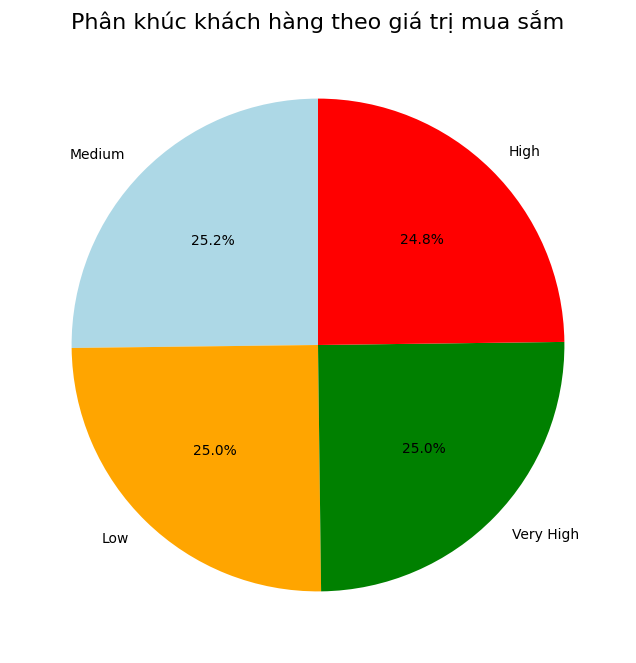

In [ ]:
# Tổng giá trị mua sắm của mỗi khách hàng
customer_total_spent = df.groupby('customer_id')['grand_total'].sum()

# Phân nhóm khách hàng
customer_total_spent = customer_total_spent.sort_values(ascending=False)
segments = pd.qcut(customer_total_spent, q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Biểu đồ phân phối phân khúc khách hàng
plt.figure(figsize=(8, 8))
segments.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'green', 'red'])
plt.title('Phân khúc khách hàng theo giá trị mua sắm', fontsize=16)
plt.ylabel('')
plt.show()

- **Phân bố khách hàng cân bằng đáng ngạc nhiên**: Điểm đáng chú ý nhất từ biểu đồ này là sự phân bố tỷ lệ khách hàng gần như đồng đều giữa tất cả bốn phân khúc giá trị mua sắm. Mỗi phân khúc đều chiếm khoảng một phần tư (25%) tổng số khách hàng. Đây là một cấu trúc phân khúc khách hàng khá cân bằng, khác biệt so với nhiều mô hình kinh doanh điển hình thường có số lượng lớn khách hàng ở phân khúc giá trị thấp.

- **Tỷ trọng lớn khách hàng giá trị cao**: Tổng cộng, 50% khách hàng thuộc vào hai phân khúc giá trị cao nhất (High và Very High). Điều này cho thấy doanh nghiệp có một lượng lớn khách hàng đóng góp giá trị đáng kể vào doanh thu. Đây là một tài sản quý báu.

- **Cơ hội phát triển ở phân khúc thấp hơn**: Mặc dù có lượng lớn khách hàng giá trị cao, 50% còn lại thuộc phân khúc Low và Medium cũng là một nhóm khách hàng tiềm năng. Kích thước đáng kể của hai phân khúc này tạo cơ hội để doanh nghiệp triển khai các chiến lược nhằm tăng giá trị mua sắm trung bình của họ theo thời gian (ví dụ: khuyến mãi mua kèm, chương trình tích điểm, gợi ý sản phẩm giá trị cao hơn).

- **Ý nghĩa chiến lược quản lý khách hàng**: Cấu trúc phân khúc cân bằng này đòi hỏi một chiến lược quản lý khách hàng đa dạng. Doanh nghiệp cần có các chương trình và ưu đãi riêng biệt cho từng nhóm:
  - **Nhóm High & Very High**: Tập trung vào việc duy trì mối quan hệ, tăng cường lòng trung thành, và có thể cung cấp các dịch vụ/lợi ích độc quyền (ví dụ: chương trình khách hàng thân thiết cao cấp, ưu đãi đặc biệt).

  - **Nhóm Medium & Low**: Áp dụng các chiến lược để khuyến khích mua sắm thường xuyên hơn hoặc mua các sản phẩm giá trị cao hơn (ví dụ: khuyến mãi theo giá trị đơn hàng, gợi ý sản phẩm cá nhân hóa, email marketing nhắm mục tiêu).

**Hạn chế về định nghĩa phân khúc**: Biểu đồ không cung cấp thông tin về ngưỡng giá trị mua sắm cụ thể để phân loại khách hàng vào từng phân khúc (ví dụ: giá trị từ X đến Y là Low, từ Y đến Z là Medium,...). Việc thiếu thông tin này khiến việc đánh giá chi tiết hơn về đặc điểm của từng nhóm (ngoài tỷ lệ) trở nên khó khăn. Cần có định nghĩa rõ ràng về từng phân khúc để hiểu sâu hơn và xây dựng chiến lược chính xác.

#### 4.5.2 Phân tích Trạng thái đơn hàng đối với danh mục sản phẩm

#### **Câu hỏi: Trạng thái đơn hàng (như hoàn thành, đã hủy, hoàn tiền) phân bố như thế nào đối với các sản phẩm trong từng danh mục cụ thể?**

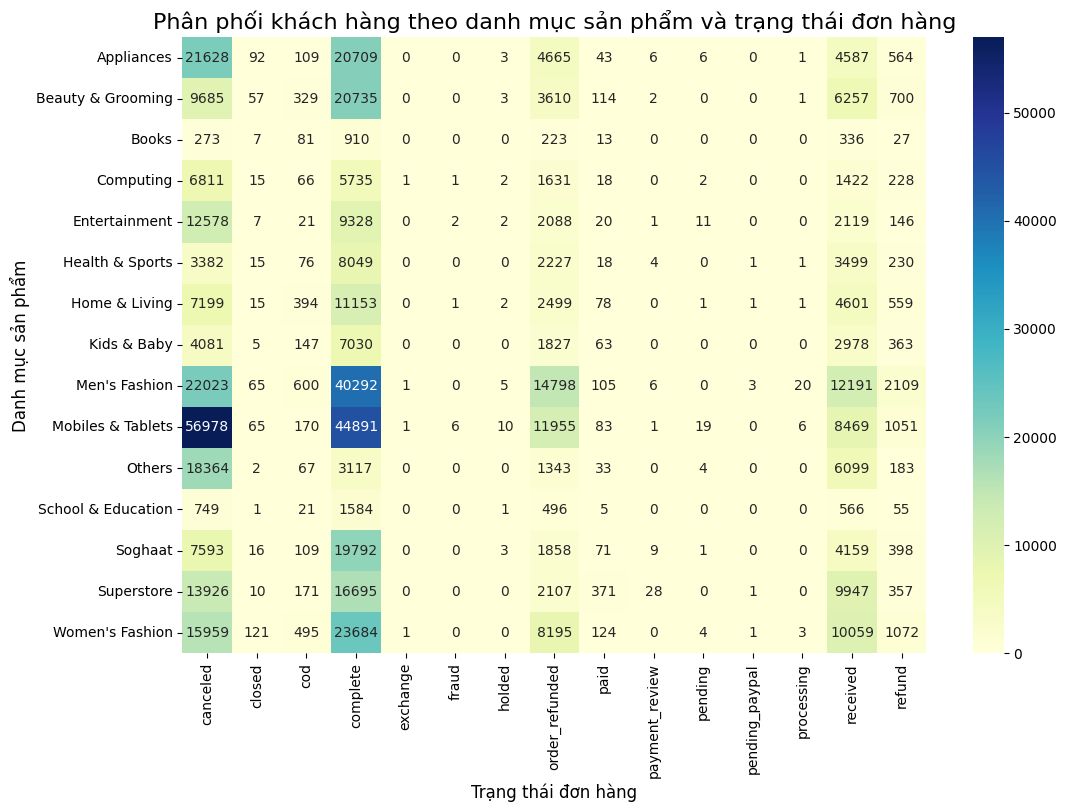

In [ ]:
# Tạo bảng tổng hợp
category_status = df.groupby(['category_name', 'status']).size().unstack(fill_value=0)

# Biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_status, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Phân phối khách hàng theo danh mục sản phẩm và trạng thái đơn hàng', fontsize=16)
plt.xlabel('Trạng thái đơn hàng', fontsize=12)
plt.ylabel('Danh mục sản phẩm', fontsize=12)
plt.show()

- **Nổi bật nhất là ô "Mobiles & Tablets" - "complete"**, cho thấy Điện thoại & Máy tính bảng là danh mục có số lượng đơn hàng hoàn thành cao nhất.
Tiếp theo là ô "Mobiles & Tablets" - "canceled" (xanh đậm thứ hai), cho thấy danh mục này cũng có số lượng đơn hàng bị hủy cao nhất, gần bằng số đơn hàng hoàn thành.

- **Các ô có tần suất cao khác bao gồm: "Men's Fashion" - "complete", "Men's Fashion" - "canceled", "Mobiles & Tablets" - "received", "Men's Fashion" - "received"**.
- **Các ô có tần suất trung bình khá như: "Mobiles & Tablets" - "order_refunded", "Men's Fashion" - "order_refunded", "Appliances" - "complete", "Women's Fashion" - "complete", "Appliances" - "canceled", "Women's Fashion" - "canceled", "Others" - "complete", "Superstore" - "complete".**

- **"Điện thoại & Máy tính bảng" và "Thời trang Nam"**: Con dao hai lưỡi: Các danh mục này là động lực doanh thu chính với số lượng đơn hàng hoàn thành cao nhất. Tuy nhiên, chúng cũng là nguồn gốc chính của các đơn hàng bị hủy và hoàn tiền về mặt số lượng tuyệt đối. Điều này cho thấy sự phổ biến và nhu cầu cao, nhưng đồng thời tồn tại những vấn đề đáng kể trong quy trình bán hàng hoặc sản phẩm ở các danh mục này, dẫn đến tỷ lệ đơn hàng không thành công cao.

- **Cần điều tra nguyên nhân hủy/hoàn tiền theo danh mục**: Tỷ lệ hủy/hoàn tiền cao ở "Mobiles & Tablets" có thể do giá trị sản phẩm lớn, rủi ro cao hơn khi mua sắm trực tuyến, hoặc kỳ vọng của khách hàng không được đáp ứng. Đối với "Men's Fashion", có thể liên quan đến vấn đề về kích cỡ, chất liệu, hoặc hình ảnh sản phẩm không khớp với thực tế. Việc phân tích sâu nguyên nhân cụ thể cho từng danh mục là cần thiết.

- **Các danh mục khác hoạt động ổn định hơn (về số lượng vấn đề tuyệt đối)**: Các danh mục có quy mô vừa và nhỏ hơn có số lượng đơn hàng hủy/hoàn tiền tuyệt đối thấp hơn. Mặc dù tỷ lệ có thể khác nhau, nhưng về mức độ đóng góp vào tổng số vấn đề, chúng ít nghiêm trọng hơn hai danh mục dẫn đầu.

- **Điểm sáng ở các trạng thái xử lý**: Số lượng đơn hàng ở các trạng thái như "pending", "processing", "payment_review" nhìn chung là thấp trên hầu hết các danh mục. Điều này (giống như phân tích biểu đồ trạng thái tổng thể) gợi ý rằng các khâu xử lý trung gian không phải là nơi phát sinh nhiều vấn đề tắc nghẽn. Các vấn đề xảy ra chủ yếu ở đầu (trước khi hoàn thành hoặc bị hủy) hoặc cuối quy trình (sau khi nhận hàng dẫn đến hoàn tiền).

### 4.6 Phân tích Chiết khấu và Lợi nhuận

#### 4.6.1 Phân tích theo tỷ lệ chiết khấu và lượng đặt hàng

#### Câu hỏi : Giảm giá có thật sự kích thích mua hàng?

Số lượng đặt hàng TRUNG BÌNH theo khoảng chiết khấu:
  discount_bin  qty_ordered
0           0%     1.326614
1        1-10%     1.029783
2       11-20%     1.044323
3       21-30%     1.144843
4       31-40%     1.220763
5       41-50%     1.475929
6       51-75%     1.958686
7         >75%     2.082730

Tổng số lượng đặt hàng theo khoảng chiết khấu:
  discount_bin  qty_ordered
0           0%       499409
1        1-10%        37896
2       11-20%        81429
3       21-30%        38382
4       31-40%        20919
5       41-50%        19590
6       51-75%        15503
7         >75%        44585


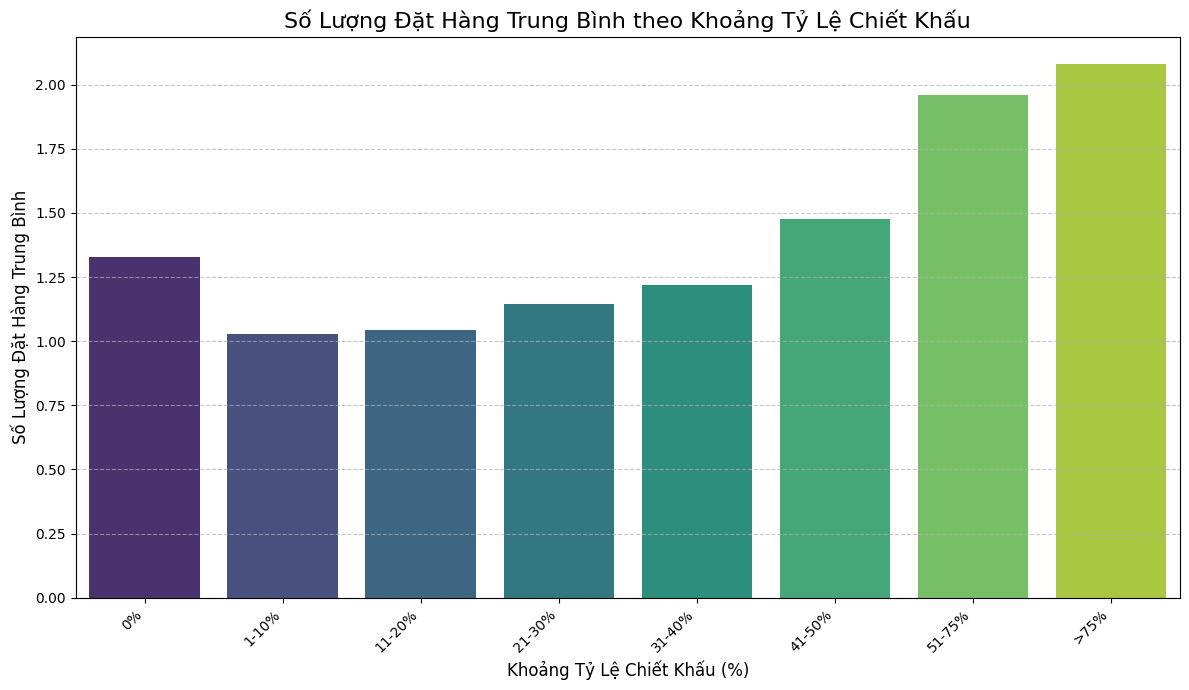

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np




df_q8 = df.copy()


df_q8['discount_percentage'] = pd.to_numeric(df_q8['discount_percentage'], errors='coerce')
df_q8['qty_ordered'] = pd.to_numeric(df_q8['qty_ordered'], errors='coerce')


df_q8['discount_percentage'].replace([np.inf, -np.inf], np.nan, inplace=True)


df_q8.dropna(subset=['discount_percentage', 'qty_ordered'], inplace=True)


df_q8['discount_percentage'] = np.clip(df_q8['discount_percentage'], 0, 100)


bins = [-0.01, 0, 10, 20, 30, 40, 50, 75, 101]

labels = ['0%', '1-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-75%', '>75%']



df_q8['discount_bin'] = pd.cut(df_q8['discount_percentage'],
                               bins=bins,
                               labels=labels,
                               right=True,
                               include_lowest=True)

analysis_q8_avg = df_q8.groupby('discount_bin', observed=False)['qty_ordered'].mean().reset_index()
analysis_q8_sum = df_q8.groupby('discount_bin', observed=False)['qty_ordered'].sum().reset_index()

print("Số lượng đặt hàng TRUNG BÌNH theo khoảng chiết khấu:")
print(analysis_q8_avg)
print("\nTổng số lượng đặt hàng theo khoảng chiết khấu:")
print(analysis_q8_sum)


plt.figure(figsize=(12, 7))
sns.barplot(x='discount_bin', y='qty_ordered', data=analysis_q8_avg, palette='viridis', hue='discount_bin', dodge=False, legend=False)
plt.title('Số Lượng Đặt Hàng Trung Bình theo Khoảng Tỷ Lệ Chiết Khấu', fontsize=16)
plt.xlabel('Khoảng Tỷ Lệ Chiết Khấu (%)', fontsize=12)
plt.ylabel('Số Lượng Đặt Hàng Trung Bình', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Nhận xét về Số Lượng Đặt Hàng **TRUNG BÌNH** theo Khoảng Chiết Khấu

- **Xu hướng rõ rệt**:  
  Khi tỷ lệ chiết khấu tăng, người tiêu dùng Pakistan có xu hướng mua số lượng sản phẩm trung bình nhiều hơn trên mỗi dòng sản phẩm.

- **Ngưỡng chiết khấu hiệu quả**:  
  Các mức chiết khấu sâu (đặc biệt **>50%**, với số lượng trung bình **~2 sản phẩm/dòng**) tỏ ra hiệu quả nhất trong việc thúc đẩy khách hàng mua nhiều đơn vị hơn cho một mặt hàng cụ thể.

- **Chiết khấu thấp ít tác động**:  
  Các mức chiết khấu nhỏ (**1-20%**) dường như không làm thay đổi đáng kể số lượng sản phẩm trung bình mua trên mỗi dòng so với khi không có chiết khấu.


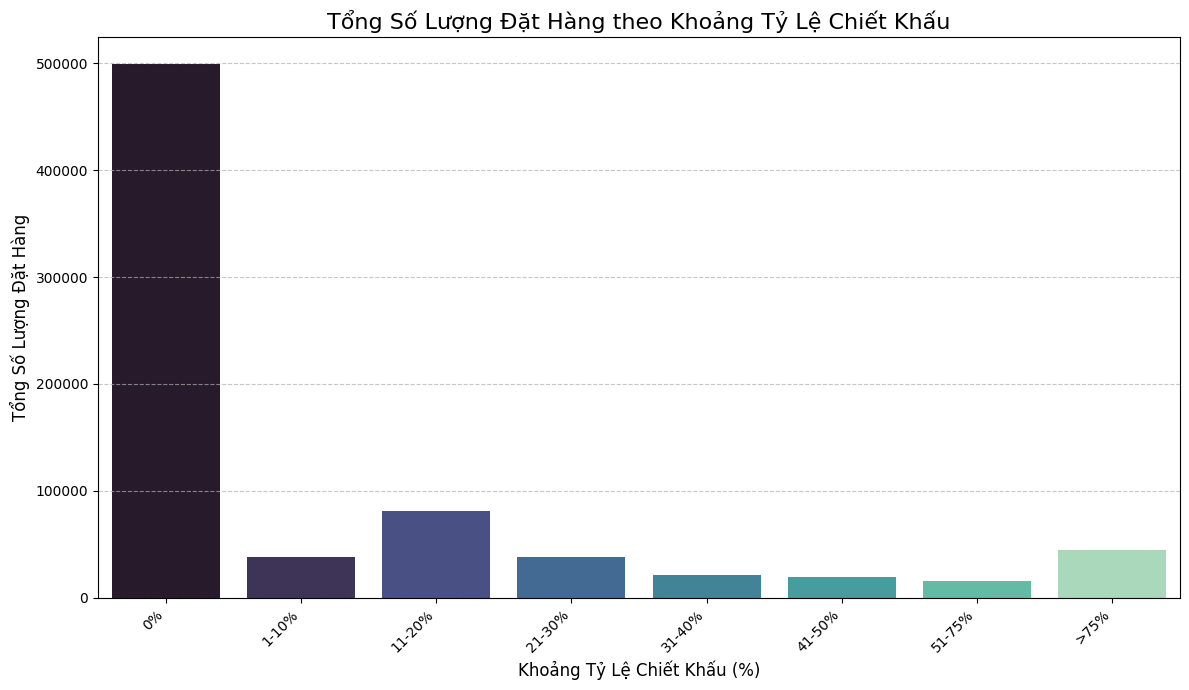

In [ ]:
# Biểu đồ 2: TỔNG số lượng đặt hàng theo khoảng chiết khấu
plt.figure(figsize=(12, 7))
sns.barplot(x='discount_bin', y='qty_ordered', data=analysis_q8_sum, palette='mako', hue='discount_bin', dodge=False, legend=False)
plt.title('Tổng Số Lượng Đặt Hàng theo Khoảng Tỷ Lệ Chiết Khấu', fontsize=16)
plt.xlabel('Khoảng Tỷ Lệ Chiết Khấu (%)', fontsize=12)
plt.ylabel('Tổng Số Lượng Đặt Hàng', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Nhận xét Về **TỔNG** Số Lượng Đặt Hàng theo Khoảng Chiết Khấu

- **Giao dịch không chiết khấu vẫn chủ đạo**:  
  Phần lớn tổng số lượng sản phẩm được giao dịch trên thị trường (theo mẫu dữ liệu) thuộc về nhóm không áp dụng chiết khấu, cho thấy **nhu cầu tự nhiên** hoặc **giá cơ bản** đã đủ hấp dẫn.

- **Vai trò của chiết khấu vừa phải**:  
  Các khoảng chiết khấu thấp đến trung bình (ví dụ: **1-20%**) vẫn đóng góp một lượng đáng kể vào tổng số sản phẩm bán ra, phản ánh sự phổ biến của các mức ưu đãi này trên thị trường.

- **Chiết khấu sâu không đồng nghĩa tổng lượng bán cao nhất**:  
  Dù chiết khấu sâu (**>50%**) làm tăng số lượng trung bình/giao dịch, nhưng tổng số sản phẩm bán ở các mức này không phải là cao nhất, có thể do việc áp dụng chiết khấu sâu có chọn lọc hơn.



Kết luận chung :

- **Người tiêu dùng phản ứng với chiết khấu sâu**:  
  Cho thấy tiềm năng của các chương trình khuyến mãi lớn trong việc tăng số lượng bán trên mỗi giao dịch.

- **Tầm quan trọng của giá trị cơ bản**:  
  Một lượng lớn giao dịch vẫn diễn ra không cần chiết khấu, nhấn mạnh vai trò của việc **định giá hợp lý** và **sức hấp dẫn tự nhiên** của sản phẩm.

- **Chiến lược khuyến mãi đa dạng**:  
  Các nhà bán lẻ trên thị trường có thể đang áp dụng nhiều mức chiết khấu khác nhau cho các mục tiêu khác nhau – từ việc **kích thích mua nhiều hơn** với chiết khấu sâu, đến việc **duy trì doanh số ổn định** với chiết khấu nhẹ hoặc không chiết khấu.

#### 4.6.2.Phân tích theo tỷ lệ thành công các đơn hàng

#### **Câu hỏi: Tỷ lệ đơn hàng thành công so với hủy là bao nhiêu?**

Đang phân tích trạng thái đơn hàng...

Tổng số đơn hàng duy nhất được phân tích: 408749
Phân bổ các trạng thái đơn hàng (số lượng) - Sắp xếp theo tần suất giảm dần:
status
complete          169515
canceled          148640
order_refunded     49062
received           35805
refund              4083
cod                  878
closed               331
paid                 294
pending               43
payment_review        39
holded                20
processing            20
fraud                 10
pending_paypal         5
exchange               4
Unknown                0
Name: count, dtype: int64


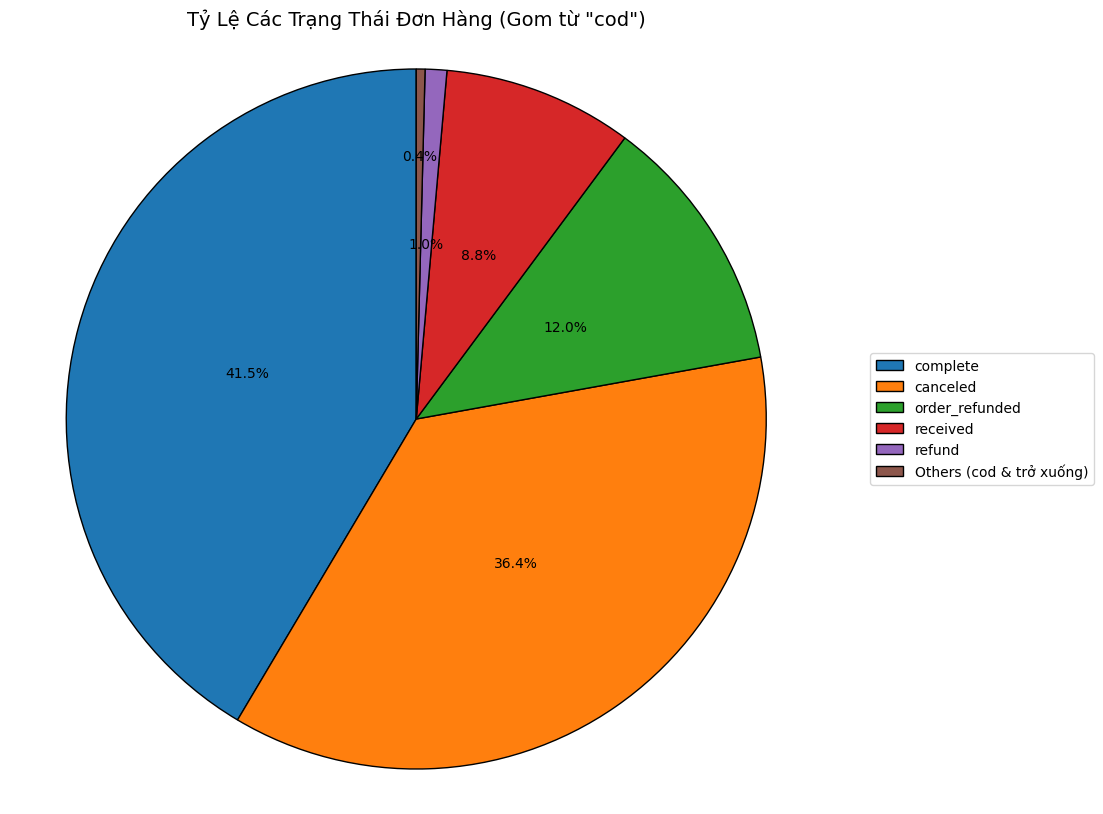


Các trạng thái đơn hàng duy nhất có trong dữ liệu của bạn (để bạn kiểm tra và cập nhật list bên dưới):
['complete', 'canceled', 'order_refunded', 'received', 'refund', 'cod', 'closed', 'paid', 'pending', 'payment_review', 'holded', 'processing', 'fraud', 'pending_paypal', 'exchange', 'Unknown']


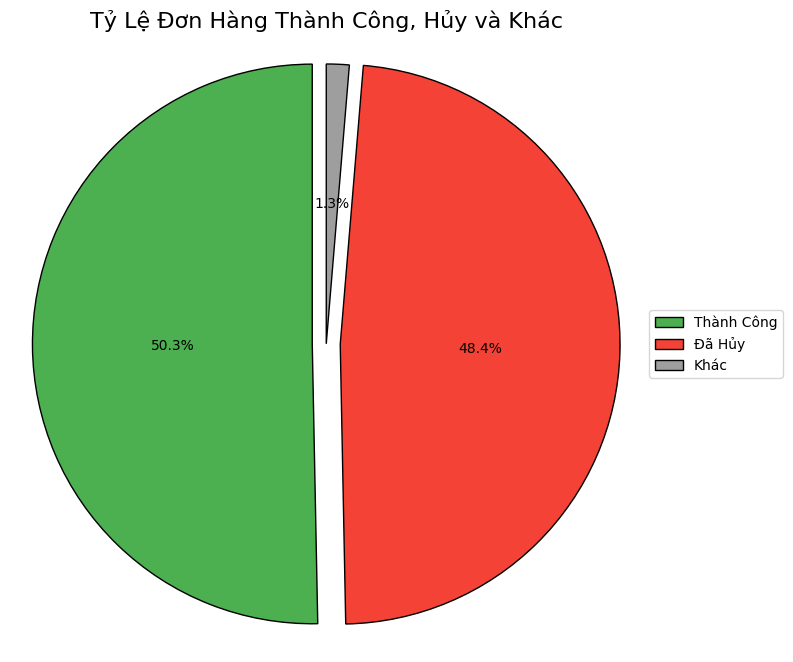


Phân tích chi tiết (dựa trên định nghĩa của bạn về 'thành công' và 'hủy'):
Tổng số đơn hàng duy nhất: 408749
Số đơn hàng được coi là 'Thành Công': 205651 (50.3%)
Số đơn hàng được coi là 'Đã Hủy': 197712 (48.4%)
Số đơn hàng 'Khác': 5386 (1.3%)


In [ ]:

if 'increment_id' not in df.columns or 'status' not in df.columns:
    print("Lỗi: DataFrame phải chứa cột 'increment_id' và 'status' để thực hiện phân tích này.")
else:
    print("Đang phân tích trạng thái đơn hàng...")
    # --- Bước 1: Lấy trạng thái cho mỗi đơn hàng duy nhất ---
    order_statuses_df = df.drop_duplicates(subset=['increment_id'])[['increment_id', 'status']].copy()

    # Xử lý cột 'status'
    if pd.api.types.is_categorical_dtype(order_statuses_df['status']):
        if 'Unknown' not in order_statuses_df['status'].cat.categories:
            order_statuses_df['status'] = order_statuses_df['status'].cat.add_categories(['Unknown'])
        order_statuses_df['status'].fillna('Unknown', inplace=True)
    else:
        order_statuses_df['status'].fillna('Unknown', inplace=True)

    status_counts = order_statuses_df['status'].value_counts() # Sắp xếp theo tần suất giảm dần
    total_unique_orders = status_counts.sum()

    print(f"\nTổng số đơn hàng duy nhất được phân tích: {total_unique_orders}")
    print("Phân bổ các trạng thái đơn hàng (số lượng) - Sắp xếp theo tần suất giảm dần:")
    print(status_counts)

    # --- Bước 2: Chuẩn bị dữ liệu cho biểu đồ tròn tổng quan THEO YÊU CẦU MỚI ---
    status_to_group_from = 'cod' # Trạng thái bắt đầu gom nhóm
    label_for_others = f'Others ({status_to_group_from} & trở xuống)'
    fallback_others_label = 'Others (ít phổ biến)'


    if not status_counts.empty:
        if status_to_group_from in status_counts.index:
            status_list_for_indexing = status_counts.index.tolist()
            try:
                group_from_idx = status_list_for_indexing.index(status_to_group_from)
                statuses_to_keep = status_counts.iloc[:group_from_idx]
                statuses_to_group_sum = status_counts.iloc[group_from_idx:].sum()

                status_pie_data_list = []
                if not statuses_to_keep.empty:
                    status_pie_data_list.append(statuses_to_keep)

                if statuses_to_group_sum > 0:
                    status_pie_data_list.append(pd.Series({label_for_others: statuses_to_group_sum}))

                if status_pie_data_list:
                    status_pie_data = pd.concat(status_pie_data_list)
                    status_pie_data = status_pie_data[status_pie_data > 0]
                else:
                    status_pie_data = pd.Series({label_for_others: statuses_to_group_sum})
                    status_pie_data = status_pie_data[status_pie_data > 0]

            except ValueError:
                print(f"Lỗi: Trạng thái '{status_to_group_from}' không tìm thấy khi lấy index. Sử dụng logic N_TOP.")
                N_TOP_STATUSES = min(7, len(status_counts))
                top_statuses = status_counts.nlargest(N_TOP_STATUSES)
                other_count = status_counts.nsmallest(len(status_counts) - N_TOP_STATUSES).sum()
                if other_count > 0:
                    status_pie_data = pd.concat([top_statuses, pd.Series({fallback_others_label: other_count})])
                else:
                    status_pie_data = top_statuses
                label_for_others = fallback_others_label
        else:
            print(f"Trạng thái '{status_to_group_from}' không tìm thấy trong danh sách. Sử dụng logic N_TOP_STATUSES để gom nhóm 'Others'.")
            N_TOP_STATUSES = min(7, len(status_counts))
            if len(status_counts) > N_TOP_STATUSES:
                top_statuses = status_counts.nlargest(N_TOP_STATUSES)
                other_count = status_counts.nsmallest(len(status_counts) - N_TOP_STATUSES).sum()
                if other_count > 0:
                    status_pie_data = pd.concat([top_statuses, pd.Series({fallback_others_label: other_count})])
                else:
                    status_pie_data = top_statuses
            else:
                status_pie_data = status_counts
            label_for_others = fallback_others_label
    else:
        status_pie_data = pd.Series()

    # --- Bước 3: Vẽ biểu đồ tròn tổng quan (với dữ liệu đã gom nhóm mới) ---
    if not status_pie_data.empty:
        plt.figure(figsize=(13, 10))
        default_pct_distance = 0.5

        patches, texts, autotexts = plt.pie(
            status_pie_data,
            labels=None,
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'edgecolor': 'black'},
            pctdistance=default_pct_distance
        )
        plt.title('Tỷ Lệ Các Trạng Thái Đơn Hàng', fontsize=14)
        plt.axis('equal')


        others_slice_index = -1
        for i, label in enumerate(status_pie_data.index):
            if label_for_others in label:
                others_slice_index = i
                break

        if others_slice_index != -1 and others_slice_index < len(autotexts):
            target_autotext = autotexts[others_slice_index]
            target_patch = patches[others_slice_index]


            angle_rad = np.deg2rad((target_patch.theta1 + target_patch.theta2) / 2)
            desired_pct_distance_others = 0.75

            x_new = desired_pct_distance_others * np.cos(angle_rad)
            y_new = desired_pct_distance_others * np.sin(angle_rad)

            target_autotext.set_position((x_new, y_new))


        plt.legend(patches, status_pie_data.index, loc="center left", bbox_to_anchor=(1.05, 0, 0.5, 1), fontsize=10)
        plt.subplots_adjust(right=0.75)
        plt.show()
    else:
        print("Không có dữ liệu trạng thái để vẽ biểu đồ tròn tổng quan sau khi áp dụng logic gom nhóm mới.")

    # --- Bước 4: Tập trung vào "Thành công" và "Hủy" (phần này giữ nguyên logic) ---

    print("\nCác trạng thái đơn hàng duy nhất có trong dữ liệu của bạn (để bạn kiểm tra và cập nhật list bên dưới):")
    print(list(status_counts.index))

    successful_statuses_list = ['complete', 'closed', 'received', 'delivered']
    canceled_statuses_list = ['canceled', 'fraud', 'order_refunded']

    count_successful = status_counts[status_counts.index.isin(successful_statuses_list)].sum()
    count_canceled = status_counts[status_counts.index.isin(canceled_statuses_list)].sum()
    count_others = total_unique_orders - count_successful - count_canceled

    if count_successful > 0 or count_canceled > 0 or count_others > 0:
        simple_labels_map = {
            'Thành Công': count_successful,
            'Đã Hủy': count_canceled,
            'Khác': count_others
        }

        final_labels_for_legend = [label for label, size in simple_labels_map.items() if size > 0]
        final_sizes = [size for size in simple_labels_map.values() if size > 0]

        available_colors = {'Thành Công': '#4CAF50', 'Đã Hủy': '#F44336', 'Khác': '#9E9E9E'}
        final_colors = []
        final_explode = []

        for label in final_labels_for_legend:
            if 'Thành Công' in label:
                final_colors.append(available_colors['Thành Công'])
                final_explode.append(0.05)
            elif 'Đã Hủy' in label:
                final_colors.append(available_colors['Đã Hủy'])
                final_explode.append(0.05)
            else: # Khác
                final_colors.append(available_colors['Khác'])
                final_explode.append(0)

        if final_sizes:
            plt.figure(figsize=(11, 8))
            patches_focused, texts_focused, autotexts_focused = plt.pie(
                final_sizes,
                labels=None,
                autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
                startangle=90,
                colors=final_colors,
                explode=final_explode,
                wedgeprops={'edgecolor': 'black'},
                pctdistance=0.5
            )
            plt.title('Tỷ Lệ Đơn Hàng Thành Công, Hủy và Khác', fontsize=16)
            plt.axis('equal')
            plt.legend(patches_focused, final_labels_for_legend, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
            plt.subplots_adjust(right=0.7)
            plt.show()

            print(f"\nPhân tích chi tiết (dựa trên định nghĩa của bạn về 'thành công' và 'hủy'):")
            print(f"Tổng số đơn hàng duy nhất: {total_unique_orders}")
            print(f"Số đơn hàng được coi là 'Thành Công': {count_successful} ({count_successful/total_unique_orders*100:.1f}%)")
            print(f"Số đơn hàng được coi là 'Đã Hủy': {count_canceled} ({count_canceled/total_unique_orders*100:.1f}%)")
            print(f"Số đơn hàng 'Khác': {count_others} ({count_others/total_unique_orders*100:.1f}%)")
        else:
            print("Không có đủ dữ liệu sau khi nhóm 'Thành Công', 'Đã Hủy', 'Khác' để vẽ biểu đồ.")
    else:
        print("\nKhông thể tính toán số liệu cho 'Thành Công' hoặc 'Đã Hủy'. Vui lòng kiểm tra lại danh sách `successful_statuses_list` và `canceled_statuses_list` cho phù hợp với dữ liệu của bạn.")



 **Biểu đồ Tròn Tổng Quan Các Trạng Thái Đơn Hàng**

- **Thực trạng thị trường**:  
  Biểu đồ cho thấy `complete` (hoàn thành) và `canceled` (đã hủy) là hai trạng thái phổ biến nhất, phản ánh hai kết cục chính của các giao dịch thương mại điện tử (TMĐT) tại Pakistan trong tập dữ liệu này.

- **Các trạng thái cần quan tâm**:  
  Các trạng thái như `order_refunded` (đơn hàng đã hoàn tiền) và `received` (đã nhận) cũng là những trạng thái quan trọng, giúp hiểu rõ hơn về vòng đời của đơn hàng.

- **Nhóm "Others"**:  
  Tỷ lệ của nhóm này cho thấy phần trăm các đơn hàng đang ở các giai đoạn trung gian hoặc có tần suất thấp hơn trên toàn thị trường (hoặc trên nền tảng được lấy mẫu).

 **Biểu đồ Tròn Tập Trung "Thành Công", "Hủy", "Khác"**

- **Insight chính về thị trường**:  
  Tỷ lệ đơn hàng được phân loại là **"Đã Hủy"** (bao gồm `canceled`, `fraud`, `order_refunded`) ở mức **48.4%** là một con số rất đáng chú ý trên quy mô thị trường TMĐT Pakistan (theo mẫu dữ liệu này). Nó gần như ngang bằng với tỷ lệ đơn hàng **"Thành Công"** là **50.3%**.

- **Đặc điểm thị trường**:  
  Tỷ lệ hủy và hoàn tiền cao có thể là một đặc điểm của thị trường TMĐT đang phát triển như Pakistan, nơi các yếu tố sau có thể góp phần vào tỷ lệ này:  
  - Sự phổ biến của phương thức thanh toán **COD (Cash on Delivery)**, cho phép khách hàng thay đổi quyết định dễ dàng hơn khi nhận hàng.  
  - Thói quen mua sắm (ví dụ: đặt nhiều đơn rồi chọn một).  
  - Các vấn đề về **logistics**, chất lượng sản phẩm từ nhiều nhà cung cấp khác nhau.  
  - Chính sách đổi trả/hoàn tiền của các sàn hoặc nhà bán lẻ.  
  - Mức độ tin cậy vào mua sắm trực tuyến.  

- **Tỷ lệ "Khác" (1.3%)**:  
  Cho thấy hầu hết các đơn hàng trong mẫu dữ liệu này đã có trạng thái cuối cùng tương đối rõ ràng.

## **5.Mô Hình Dự Báo Doanh Số**

### Bước 1: Chuẩn bị Dữ liệu Doanh Thu Nửa Tháng

Bước này chuẩn bị dữ liệu thô để tạo chuỗi thời gian doanh thu theo từng nửa tháng, phục vụ cho việc dự báo.

1.  **Tải và Chọn Dữ liệu:** Tải dataset, chọn cột `working_date` làm mốc thời gian và `grand_total` làm giá trị doanh thu.
2.  **Chuyển đổi Kiểu:** Đảm bảo `working_date` là kiểu `datetime` và `grand_total` là kiểu số.
3.  **Lọc Đơn Hàng:** Chỉ giữ lại các đơn hàng thành công (trạng thái `complete` hoặc `received`).
4.  **Xử lý Trùng lặp & Thiếu sót:** Loại bỏ đơn hàng trùng (`increment_id`) và các dòng thiếu `working_date` hoặc `grand_total`.
5.  **Tạo Feature "Nửa Tháng":**
    * Dựa vào ngày trong `working_date`, chia tháng thành 2 nửa: ngày 1-15 (nửa 1) và ngày 16-cuối tháng (nửa 2).
    * Tạo cột `half_month_period_start` làm index, với giá trị là ngày 1 (cho nửa 1) hoặc ngày 16 (cho nửa 2) của tháng tương ứng.
6.  **Tổng hợp Doanh Thu:** Tính tổng `grand_total` cho mỗi kỳ nửa tháng dựa trên `half_month_period_start`. Kết quả là Series `half_monthly_sales`.
7.  **Đảm bảo Tính Liên Tục:** `Reindex` chuỗi `half_monthly_sales` để bao gồm tất cả các kỳ nửa tháng trong khoảng thời gian phân tích, điền `0` cho các kỳ không có doanh thu.
8.  **Kiểm tra Sơ bộ:** Đưa ra cảnh báo nếu dữ liệu quá ngắn cho việc xây dựng mô hình mùa vụ (đặc biệt khi chu kỳ mùa vụ là 24 kỳ nửa tháng/năm).

Kết quả của bước này là chuỗi thời gian `half_monthly_sales` đã được làm sạch và chuẩn bị cho các phân tích tiếp theo.

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


# --- Bắt đầu Bước 1: Xử lý dữ liệu cho mô hình dự báo doanh số theo NỬA THÁNG ---


date_column_for_ts = 'working_date'
value_column_for_ts = 'grand_total' # Cột giá trị không đổi


required_cols_step1 = ['status', 'increment_id', value_column_for_ts, date_column_for_ts]
missing_cols = [col for col in required_cols_step1 if col not in df.columns]


half_monthly_sales = pd.Series(dtype='float64')

if missing_cols:
    print(f"LỖI: Thiếu các cột cần thiết cho Bước 1: {missing_cols}")
else:
    print(f"Sử dụng cột '{date_column_for_ts}' cho ngày tháng và '{value_column_for_ts}' cho doanh số.")


    df_forecast_prep = df.copy()

    # 1. Chuyển đổi cột ngày tháng ('Working Date') sang datetime
    print(f"Đang cố gắng chuyển đổi cột '{date_column_for_ts}' sang datetime...")
    df_forecast_prep[date_column_for_ts] = pd.to_datetime(df_forecast_prep[date_column_for_ts], errors='coerce')

    # 2. Chuyển đổi cột giá trị sang kiểu số
    if not pd.api.types.is_numeric_dtype(df_forecast_prep[value_column_for_ts]):
        print(f"Đang cố gắng chuyển đổi cột '{value_column_for_ts}' sang kiểu số...")
        df_forecast_prep[value_column_for_ts] = pd.to_numeric(df_forecast_prep[value_column_for_ts], errors='coerce')

    # 3. Lọc theo status 'complete' và 'received'
    successful_statuses = ['complete', 'received']
    df_successful = df_forecast_prep[df_forecast_prep['status'].isin(successful_statuses)]
    print(f"\nSố dòng sau khi lọc theo status {successful_statuses}: {len(df_successful)}")

    if not df_successful.empty:
        # 4. Lấy grand_total duy nhất cho mỗi đơn hàng thành công
        cols_to_keep = [date_column_for_ts, 'increment_id', value_column_for_ts]
        df_unique_orders = df_successful[cols_to_keep].drop_duplicates(subset=['increment_id'], keep='first')
        print(f"Số đơn hàng thành công duy nhất: {len(df_unique_orders)}")

        # 5. Loại bỏ các dòng có ngày tháng hoặc giá trị là NaT/NaN sau các bước trên
        df_unique_orders.dropna(subset=[date_column_for_ts, value_column_for_ts], inplace=True)
        print(f"Số đơn hàng thành công duy nhất sau khi loại bỏ NaN ở cột ngày/giá trị: {len(df_unique_orders)}")

        if not df_unique_orders.empty:
            # 6. Tạo feature 'half_month' và 'half_month_period_start'
            df_unique_orders['day_of_month'] = df_unique_orders[date_column_for_ts].dt.day
            df_unique_orders['half_month_indicator'] = np.where(df_unique_orders['day_of_month'] <= 15, 1, 2)

            # Tạo ngày bắt đầu cho mỗi nửa tháng để làm index
            # Nửa 1: YYYY-MM-01
            # Nửa 2: YYYY-MM-16
            def get_half_month_start_date(row):
                year = row[date_column_for_ts].year
                month = row[date_column_for_ts].month
                if row['half_month_indicator'] == 1:
                    return pd.Timestamp(year=year, month=month, day=1)
                else:
                    return pd.Timestamp(year=year, month=month, day=16)

            df_unique_orders['half_month_period_start'] = df_unique_orders.apply(get_half_month_start_date, axis=1)

            # 7. Đặt 'half_month_period_start' làm index và tổng hợp doanh số
            df_ts_half_monthly = df_unique_orders.set_index('half_month_period_start')
            half_monthly_sales = df_ts_half_monthly[value_column_for_ts].groupby(level=0).sum()


            if not half_monthly_sales.empty:
                min_date = half_monthly_sales.index.min()
                max_date = half_monthly_sales.index.max()

                # Tạo một dải ngày đầy đủ các ngày mùng 1 và 16 hàng tháng
                date_range_1st = pd.date_range(start=min_date.replace(day=1), end=max_date.replace(day=1), freq='MS')
                date_range_16th = pd.date_range(start=min_date.replace(day=16) if min_date.day > 15 else min_date.replace(day=1).replace(day=16),
                                                end=max_date.replace(day=16) if max_date.day > 15 else max_date.replace(day=1).replace(day=16),
                                                freq='MS') + pd.DateOffset(days=15)


                full_half_month_idx = []
                current_date = min_date.replace(day=1)
                while current_date <= max_date:
                    full_half_month_idx.append(current_date)
                    if current_date.day == 1:

                        next_potential_date = current_date.replace(day=16)
                        if next_potential_date <= max_date or (next_potential_date.year == max_date.year and next_potential_date.month == max_date.month):
                             full_half_month_idx.append(next_potential_date)
                        current_date = current_date + pd.offsets.MonthBegin()
                    else:
                        current_date = current_date.replace(day=1) + pd.offsets.MonthBegin()


                full_half_month_idx = pd.DatetimeIndex(sorted(list(set(full_half_month_idx))))
                full_half_month_idx = full_half_month_idx[full_half_month_idx <= max_date.replace(day=16 if max_date.day >15 else 1)]


                half_monthly_sales = half_monthly_sales.reindex(full_half_month_idx, fill_value=0)


            print("\nDoanh thu theo NỬA THÁNG (từ grand_total của đơn hàng thành công):")
            print(half_monthly_sales)
            print(f"\nSố lượng kỳ nửa tháng có dữ liệu: {len(half_monthly_sales)}")


            if len(half_monthly_sales) < 24:
                 print("\nCẢNH BÁO: Dữ liệu chuỗi thời gian có thể quá ngắn để xây dựng mô hình dự báo đáng tin cậy.")
                 print("Thông thường cần nhiều dữ liệu hơn, ví dụ ít nhất 2-3 chu kỳ mùa vụ.")
            if len(half_monthly_sales) > 0 and len(half_monthly_sales) < 48 :
                 print("\nCẢNH BÁO: Dữ liệu chuỗi thời gian có thể không đủ dài cho việc phân rã mùa vụ (seasonal_decompose) với chu kỳ năm (period=24).")

        else:
            print("DataFrame rỗng sau khi xử lý đơn hàng duy nhất và loại bỏ NaN.")
    else:
        print("Không có đơn hàng nào với status 'complete' hoặc 'received'.")


Sử dụng cột 'working_date' cho ngày tháng và 'grand_total' cho doanh số.
Đang cố gắng chuyển đổi cột 'working_date' sang datetime...

Số dòng sau khi lọc theo status ['complete', 'received']: 310993
Số đơn hàng thành công duy nhất: 205320
Số đơn hàng thành công duy nhất sau khi loại bỏ NaN ở cột ngày/giá trị: 205320

Doanh thu theo NỬA THÁNG (từ grand_total của đơn hàng thành công):
2016-07-01      2999271
2016-07-16      5114685
2016-08-01      8105181
2016-08-16      6811951
2016-09-01      8267505
2016-09-16     14215274
2016-10-01      8025711
2016-10-16      8979895
2016-11-01      6903106
2016-11-16     64315544
2016-12-01      8775801
2016-12-16     10641853
2017-01-01     12716228
2017-01-16     11069546
2017-02-01     11323871
2017-02-16      7979530
2017-03-01     13011395
2017-03-16     16548610
2017-04-01     12542709
2017-04-16     11967216
2017-05-01      6502994
2017-05-16     35772807
2017-06-01     25956977
2017-06-16      4810691
2017-07-01      5586512
2017-07-16    

### Bước 2: Phân tích Khám phá Dữ liệu Chuỗi Thời gian (Time Series EDA) - Doanh Thu Nửa Tháng

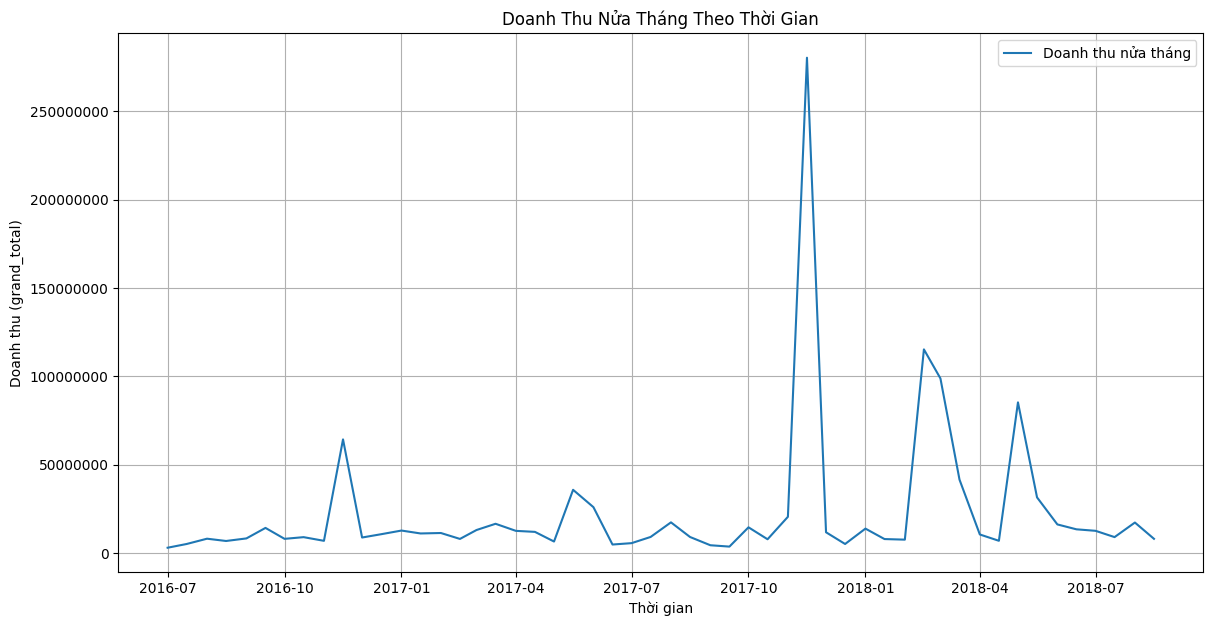


--- Phân rã chuỗi thời gian (Dữ liệu nửa tháng) ---


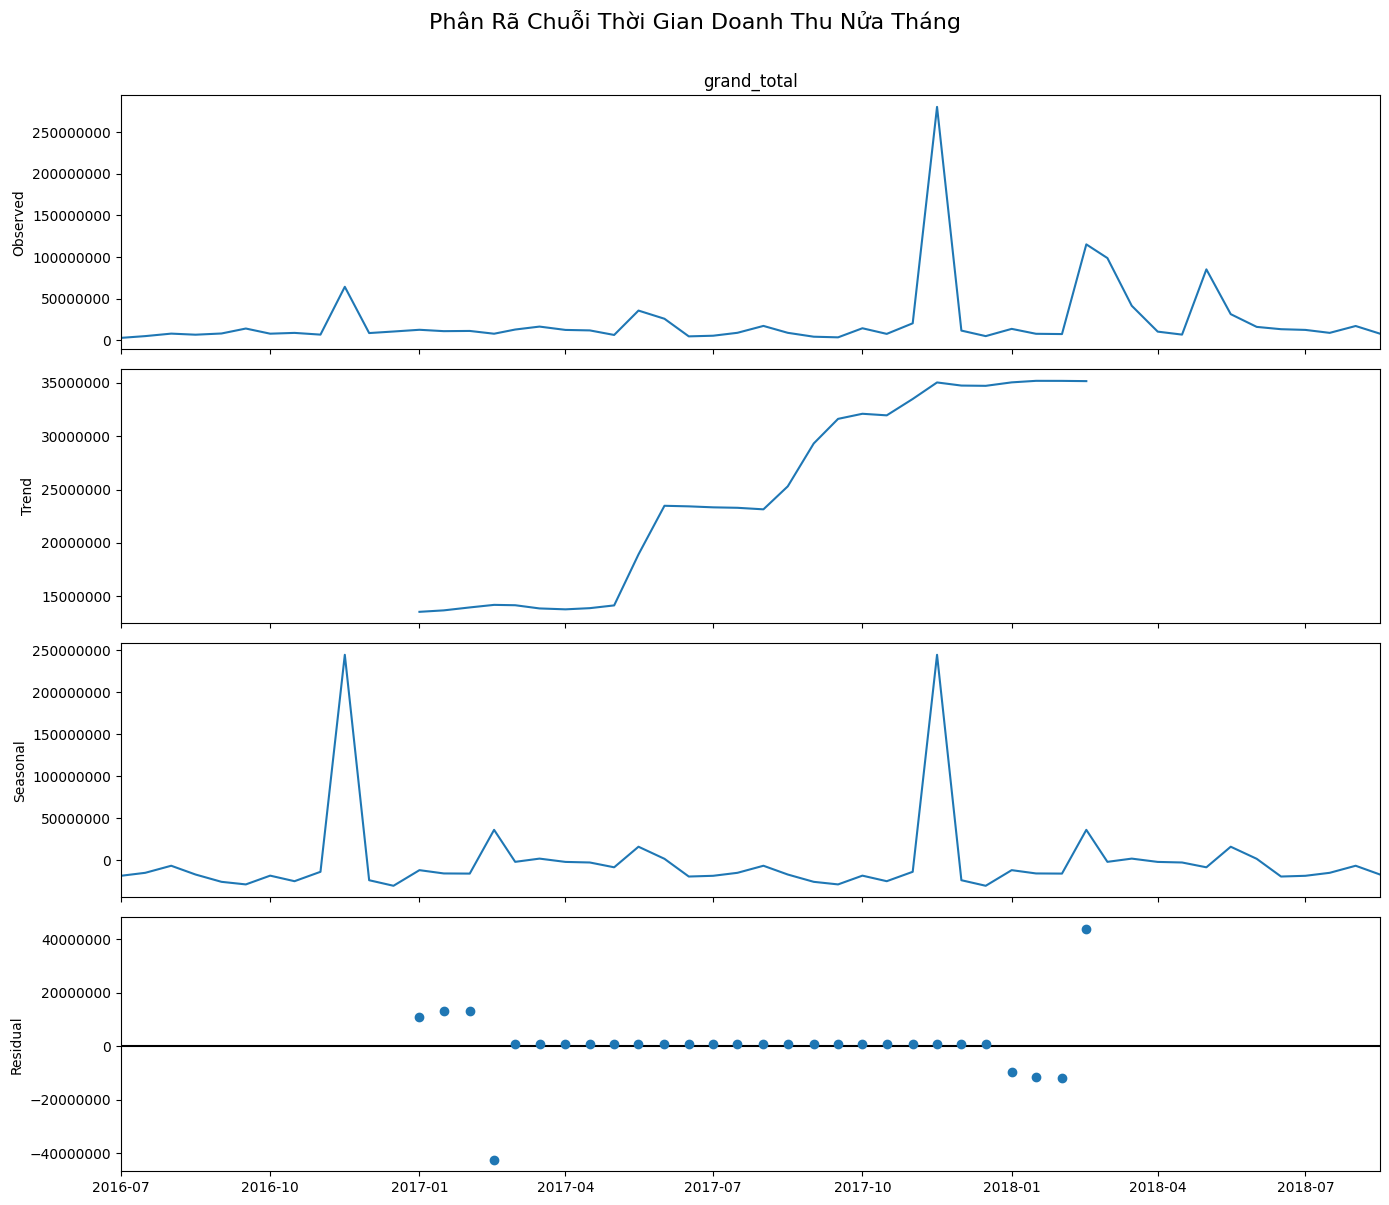


--- Kiểm tra tính dừng (ADF Test) cho Doanh thu nửa tháng ---
Kết quả kiểm định Dickey-Fuller tăng cường cho Doanh thu nửa tháng ban đầu:
Test Statistic                -6.478786e+00
p-value                        1.310776e-08
#Lags Used                     0.000000e+00
Number of Observations Used    5.100000e+01
Critical Value (1%)           -3.565624e+00
Critical Value (5%)           -2.920142e+00
Critical Value (10%)          -2.598015e+00
dtype: float64
=> Dữ liệu có tính dừng (bác bỏ giả thuyết H0)

--- Biểu đồ Tự tương quan (ACF) và Tự tương quan riêng phần (PACF) cho Doanh thu nửa tháng ---


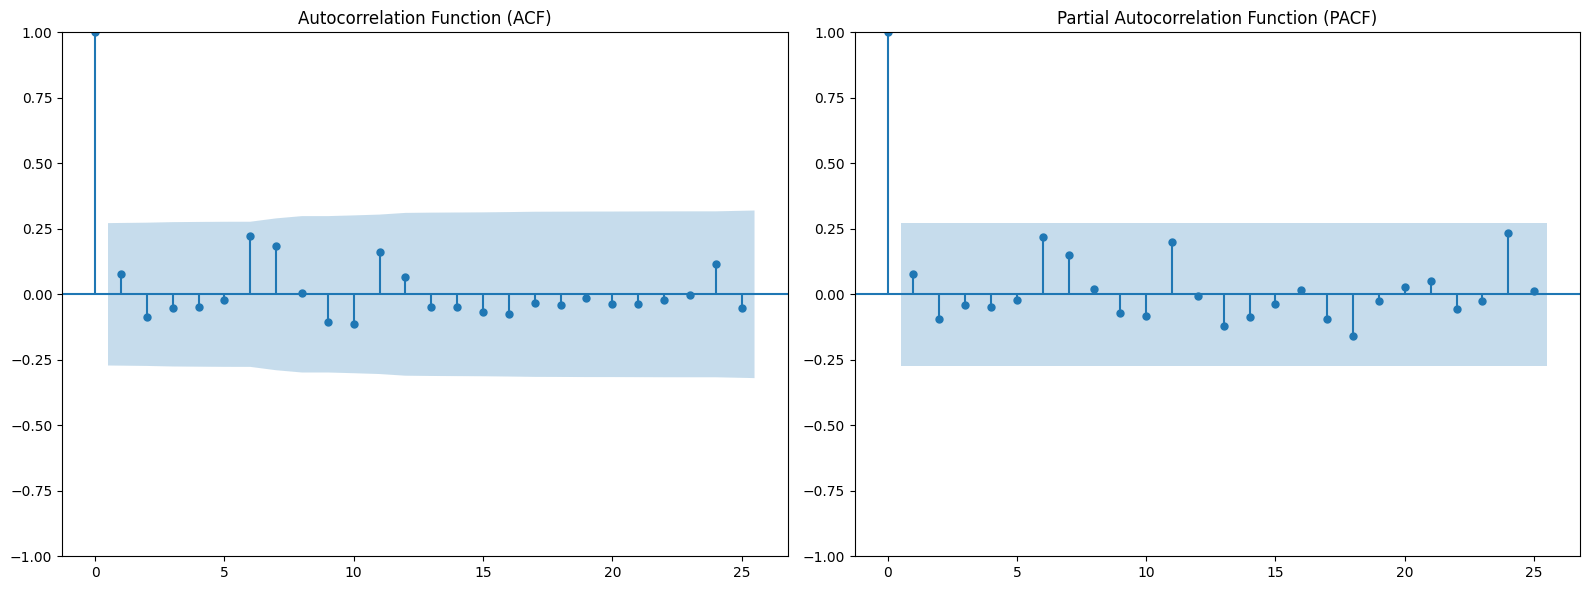


--- Kết thúc Bước 2 ---


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.ticker import ScalarFormatter

if 'half_monthly_sales' not in locals() or half_monthly_sales.empty:
    print("Biến 'half_monthly_sales' không tồn tại hoặc rỗng. Tạo dữ liệu mẫu...")

    num_years_sample = 3
    periods_sample = num_years_sample * 24
    sample_start_date = '2016-01-01'

    dates_list = []
    current_date = pd.Timestamp(sample_start_date)
    for _ in range(num_years_sample * 12):
        dates_list.append(current_date)
        dates_list.append(current_date.replace(day=16))
        current_date += pd.DateOffset(months=1)

    sample_index = pd.DatetimeIndex(dates_list[:periods_sample])

    sales_sample_values = np.abs(np.random.normal(loc=2.5e7, scale=1e7, size=periods_sample) + \
                             np.arange(periods_sample) * 0.5e6 + \
                             np.sin(np.arange(periods_sample) * np.pi/12) * 0.8e7 + \
                             np.cos(np.arange(periods_sample) * np.pi/6) * 0.4e7)

    half_monthly_sales = pd.Series(sales_sample_values, index=sample_index)
    half_monthly_sales.name = 'grand_total'
    print("Đã sử dụng dữ liệu half_monthly_sales mẫu.")

# --- Bắt đầu Bước 2: Phân tích Khám phá Dữ liệu Chuỗi Thời gian (Time Series EDA) cho Dữ liệu Nửa Tháng ---

# Biểu đồ doanh số nửa tháng
if 'half_monthly_sales' in locals() and not half_monthly_sales.empty and len(half_monthly_sales) >= 12: # Cần ít nhất vài điểm để vẽ có ý nghĩa
    plt.figure(figsize=(14, 7))
    plt.plot(half_monthly_sales, label='Doanh thu nửa tháng')
    plt.title('Doanh Thu Nửa Tháng Theo Thời Gian')
    plt.xlabel('Thời gian')
    plt.ylabel(f'Doanh thu ({half_monthly_sales.name if half_monthly_sales.name else "Giá trị"})')


    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
    ax.ticklabel_format(style='plain', axis='y')

    plt.legend()
    plt.grid(True)
    plt.show()
else:
    if 'half_monthly_sales' in locals() and not half_monthly_sales.empty:
         print(f"Không đủ dữ liệu ({len(half_monthly_sales)} điểm) để vẽ biểu đồ doanh thu nửa tháng một cách rõ ràng.")


# Phân rã chuỗi thời gian và các phân tích khác
if 'half_monthly_sales' in locals() and not half_monthly_sales.empty and len(half_monthly_sales) >= 48:
    print("\n--- Phân rã chuỗi thời gian (Dữ liệu nửa tháng) ---")
    # Với dữ liệu nửa tháng và mùa vụ hàng năm, period = 24
    decomposition = seasonal_decompose(half_monthly_sales, model='additive', period=24)
    fig_decomposition = decomposition.plot()
    fig_decomposition.set_size_inches(14, 12)

    # Định dạng trục Y cho các biểu đồ con trong phân rã
    axes_decomposition = fig_decomposition.axes
    if len(axes_decomposition) >= 4:
        for i, ax_label in enumerate(['Observed', 'Trend', 'Seasonal', 'Residual']):
            ax_current_decomp = axes_decomposition[i]
            ax_current_decomp.set_ylabel(ax_label) # Đặt lại nhãn trục Y cho rõ ràng
            ax_current_decomp.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
            ax_current_decomp.ticklabel_format(style='plain', axis='y')

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Điều chỉnh layout để tiêu đề không chồng chéo
    fig_decomposition.suptitle('Phân Rã Chuỗi Thời Gian Doanh Thu Nửa Tháng', fontsize=16, y=1.0) # Thêm tiêu đề chính
    plt.show()

    # --- Kiểm tra tính dừng bằng ADF test ---
    print("\n--- Kiểm tra tính dừng (ADF Test) cho Doanh thu nửa tháng ---")
    def adf_test(series, series_name=""):
        print(f'Kết quả kiểm định Dickey-Fuller tăng cường cho {series_name}:')
        dftest = adfuller(series.dropna(), autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
        if dftest[1] <= 0.05:
            print("=> Dữ liệu có tính dừng (bác bỏ giả thuyết H0)")
        else:
            print("=> Dữ liệu không có tính dừng (không bác bỏ giả thuyết H0)")

    adf_test(half_monthly_sales, "Doanh thu nửa tháng ban đầu")

    half_monthly_sales_stationary = half_monthly_sales.copy()


    # --- Vẽ ACF và PACF ---
    if not half_monthly_sales_stationary.dropna().empty and len(half_monthly_sales_stationary.dropna()) > 1:
        print("\n--- Biểu đồ Tự tương quan (ACF) và Tự tương quan riêng phần (PACF) cho Doanh thu nửa tháng ---")
        fig_acf_pacf, axes_acf_pacf = plt.subplots(1, 2, figsize=(16, 6))

        n_obs_stationary = len(half_monthly_sales_stationary.dropna())

        max_lags_val = min(40, n_obs_stationary // 2 - 1)

        if max_lags_val > 0:
            plot_acf(half_monthly_sales_stationary.dropna(), ax=axes_acf_pacf[0], lags=max_lags_val)
            axes_acf_pacf[0].set_title('Autocorrelation Function (ACF)')

            plot_pacf(half_monthly_sales_stationary.dropna(), ax=axes_acf_pacf[1], lags=max_lags_val)
            axes_acf_pacf[1].set_title('Partial Autocorrelation Function (PACF)')

            plt.tight_layout()
            plt.show()
        else:
            print(f"Không đủ dữ liệu ({n_obs_stationary} điểm) trong chuỗi đã dừng để tính toán lags hợp lệ cho ACF/PACF.")
    else:
        print("Chuỗi dữ liệu (half_monthly_sales_stationary) rỗng hoặc quá ngắn để vẽ ACF/PACF.")

elif 'half_monthly_sales' in locals() and not half_monthly_sales.empty: # Nếu dữ liệu không đủ dài cho phân rã
    print(f"Không đủ dữ liệu ({len(half_monthly_sales)} điểm) để thực hiện phân rã mùa vụ đáng tin cậy (cần ít nhất 48 kỳ nửa tháng).")
    print("\n--- Kiểm tra tính dừng (ADF Test) cho dữ liệu nửa tháng gốc ---")
    if 'adf_test' not in globals():
        def adf_test(series, series_name=""):
            print(f'Kết quả kiểm định Dickey-Fuller tăng cường cho {series_name}:')
            dftest = adfuller(series.dropna(), autolag='AIC')
            dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
            for key,value in dftest[4].items():
                dfoutput['Critical Value (%s)'%key] = value
            print(dfoutput)
            if dftest[1] <= 0.05:
                print("=> Dữ liệu có tính dừng (bác bỏ giả thuyết H0)")
            else:
                print("=> Dữ liệu không có tính dừng (không bác bỏ giả thuyết H0)")
    adf_test(half_monthly_sales, "Doanh thu nửa tháng ban đầu")
else:
    if 'half_monthly_sales' not in locals() or half_monthly_sales.empty:
         print("Biến 'half_monthly_sales' không được khởi tạo hoặc rỗng. Không thể thực hiện Bước 2.")

print("\n--- Kết thúc Bước 2 ---")

#### Đánh giá sau Bước 2: Phân tích Khám phá Dữ liệu Chuỗi Thời gian

Sau khi chuẩn bị chuỗi `half_monthly_sales`, Bước 2 tập trung vào khám phá đặc tính của nó.

**Kết quả chính:**

1.  **Trực quan hóa Chuỗi :** Biểu đồ cho thấy doanh thu nửa tháng có biến động và các đỉnh lặp lại, gợi ý tính mùa vụ hàng năm trên dữ liệu kéo dài hơn 2 năm (51 điểm). Không có xu hướng dài hạn rõ ràng.

2.  **Kiểm tra Tính Dừng (ADF Test):**
    * `p-value = 1.31e-08` (rất nhỏ).
    * **Kết luận:** Chuỗi `half_monthly_sales` **có tính dừng**. Điều này ngụ ý tham số sai phân không mùa vụ `d=0` cho SARIMA. Có thể thử `D=0` cho sai phân mùa vụ ban đầu.

3.  **Phân tích ACF :**
    * Các đỉnh đáng kể ở trễ 1, 2.
    * **Quan trọng:** Có đỉnh dương đáng kể tại **trễ 24**, khẳng định mạnh mẽ tính mùa vụ hàng năm và gợi ý thành phần SMA mùa vụ (Q).

4.  **Phân tích PACF :**
    * Đỉnh đáng kể ở trễ 1 (dương) và trễ 2 (âm), sau đó "cắt đứt". Gợi ý thành phần AR không mùa vụ bậc 1 hoặc 2 (p).
    * **Quan trọng:** Có đỉnh dương đáng kể tại **trễ 24**, gợi ý thành phần SAR mùa vụ (P).

**Gợi ý cho tham số SARIMA `(p,d,q)(P,D,Q,m)`:**

* **Không mùa vụ `(p,d,q)`:** `d=0`. Dựa vào PACF, thử `p=1` hoặc `p=2`. Với ACF giảm dần (bị ảnh hưởng bởi đỉnh mùa vụ), thử `q=0`. => Ví dụ: `(2,0,0)` hoặc `(1,0,0)`.
* **Mùa vụ `(P,D,Q,m)`:** `m=24`. Với chuỗi gốc dừng, thử `D=0`.
    * PACF có đỉnh ở trễ 24 => Gợi ý `P=1`.
    * ACF có đỉnh ở trễ 24 => Gợi ý `Q=1`.


### Bước 3: Lựa chọn và Huấn luyện Mô hình SARIMA

In [ ]:
# --- Bước 3: Lựa chọn và Huấn luyện Mô hình (cho dữ liệu nửa tháng) ---


from statsmodels.tsa.arima.model import ARIMA

train_data_hm = pd.Series(dtype='float64')
test_data_hm = pd.Series(dtype='float64')
predictions_sarima_hm = pd.Series(dtype='float64')
model_sarima_fitted_hm = None

(p,d,q) = (2,0,0)
(P,D,Q,m) = (1,1,1,24)

print(f"Tham số SARIMA dự kiến: order=({p},{d},{q}), seasonal_order=({P},{D},{Q},{m})")

MIN_DATA_POINTS_FOR_SARIMA = m * 2
if 'half_monthly_sales' in locals() and not half_monthly_sales.empty and len(half_monthly_sales) >= MIN_DATA_POINTS_FOR_SARIMA:


    min_train_size = m + (p + q + P + Q) + 6 # Tối thiểu cho train
    if len(half_monthly_sales) - m >= min_train_size :
        train_size = len(half_monthly_sales) - m
    elif len(half_monthly_sales) * 0.8 >= min_train_size:
        train_size = int(len(half_monthly_sales) * 0.8)
    else:
        train_size = len(half_monthly_sales)

    if train_size < len(half_monthly_sales) and (len(half_monthly_sales) - train_size) > 0:
        train_data_hm, test_data_hm = half_monthly_sales[0:train_size], half_monthly_sales[train_size:len(half_monthly_sales)]
        print(f"\nKích thước tập Train (nửa tháng): {len(train_data_hm)}")
        print(f"Kích thước tập Test (nửa tháng): {len(test_data_hm)}")

        # --- Huấn luyện mô hình SARIMA ---
        try:
            print(f"\nĐang huấn luyện mô hình SARIMA({p},{d},{q})({P},{D},{Q},{m}) trên tập train...")

            model_sarima = ARIMA(train_data_hm,
                                 order=(p,d,q),
                                 seasonal_order=(P,D,Q,m),
                                 enforce_stationarity=False, # Dữ liệu đã dừng (d=0, D=0) nên False là OK
                                 enforce_invertibility=False)

            model_sarima_fitted_hm = model_sarima.fit()
            print("\n--- Tóm tắt mô hình SARIMA sau khi huấn luyện trên tập Train ---")
            print(model_sarima_fitted_hm.summary())

            # Dự báo trên tập test
            print(f"\nĐang dự báo trên tập Test (cho {len(test_data_hm)} kỳ nửa tháng tiếp theo)...")
            predictions_sarima_hm = model_sarima_fitted_hm.forecast(steps=len(test_data_hm))
            if not test_data_hm.empty: # Đảm bảo index khớp
                predictions_sarima_hm.index = test_data_hm.index

        except Exception as e:
            print(f"LỖI khi huấn luyện hoặc dự báo với SARIMA: {e}")
            print("Cân nhắc kiểm tra lại tham số, đặc biệt là P, D, Q từ ACF/PACF với lags dài, hoặc thử mô hình ARIMA đơn giản hơn.")
            if d == 0 and D == 0 :
                try:
                    print(f"\nThử huấn luyện mô hình ARIMA({p},{d},{q}) đơn giản trên tập train...")
                    model_arima_simple = ARIMA(train_data_hm, order=(p,d,q))
                    model_arima_simple_fitted = model_arima_simple.fit()
                    print("\n--- Tóm tắt mô hình ARIMA đơn giản sau khi huấn luyện trên tập Train ---")
                    print(model_arima_simple_fitted.summary())

                    predictions_arima_simple_hm = model_arima_simple_fitted.forecast(steps=len(test_data_hm))
                    if not test_data_hm.empty:
                        predictions_arima_simple_hm.index = test_data_hm.index

                    predictions_sarima_hm = predictions_arima_simple_hm
                    model_sarima_fitted_hm = model_arima_simple_fitted
                    print("Đã sử dụng mô hình ARIMA đơn giản do SARIMA gặp lỗi hoặc để so sánh.")
                except Exception as e_simple:
                    print(f"LỖI khi huấn luyện ARIMA đơn giản: {e_simple}")
    else:
        print("\nKhông đủ dữ liệu để chia train/test một cách có ý nghĩa cho SARIMA.")
        print("Sẽ huấn luyện mô hình trên toàn bộ dữ liệu hiện có.")
        train_data_hm = half_monthly_sales.copy()
        test_data_hm = pd.Series(dtype='float64')

        if len(train_data_hm) >= m + (p+q+P+Q):
            try:
                print(f"\nĐang huấn luyện mô hình SARIMA({p},{d},{q})({P},{D},{Q},{m}) trên TOÀN BỘ dữ liệu...")
                model_sarima_full = ARIMA(train_data_hm,
                                          order=(p,d,q),
                                          seasonal_order=(P,D,Q,m),
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
                model_sarima_fitted_hm = model_sarima_full.fit()
                print("\n--- Tóm tắt mô hình SARIMA sau khi huấn luyện trên TOÀN BỘ dữ liệu ---")
                print(model_sarima_fitted_hm.summary())
                print("Mô hình đã được huấn luyện trên toàn bộ dữ liệu. Sẵn sàng cho dự báo tương lai (không có đánh giá trên tập test).")
            except Exception as e_full:
                print(f"LỖI khi huấn luyện SARIMA trên toàn bộ dữ liệu: {e_full}")
        else:
            print(f"Dữ liệu quá ngắn ({len(train_data_hm)} điểm) ngay cả khi dùng toàn bộ cho order SARIMA ({p},{d},{q})({P},{D},{Q},{m}) đã chọn.")
else:
    if 'half_monthly_sales' in locals() and not half_monthly_sales.empty:
        print(f"Không đủ dữ liệu 'half_monthly_sales' ({len(half_monthly_sales)} điểm, yêu cầu ít nhất {MIN_DATA_POINTS_FOR_SARIMA}) để huấn luyện mô hình SARIMA một cách đáng tin cậy.")
    else:
        print("Biến 'half_monthly_sales' không tồn tại hoặc rỗng. Không thể thực hiện Bước 3.")

print("\n--- Kết thúc Bước 3 ---")

Tham số SARIMA dự kiến: order=(2,0,0), seasonal_order=(1,1,1,24)

Kích thước tập Train (nửa tháng): 41
Kích thước tập Test (nửa tháng): 11

Đang huấn luyện mô hình SARIMA(2,0,0)(1,1,1,24) trên tập train...

--- Tóm tắt mô hình SARIMA sau khi huấn luyện trên tập Train ---
                                     SARIMAX Results                                      
Dep. Variable:                        grand_total   No. Observations:                   41
Model:             ARIMA(2, 0, 0)x(1, 1, [1], 24)   Log Likelihood                   0.000
Date:                            Wed, 21 May 2025   AIC                             10.000
Time:                                    11:06:24   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 41                                         
Covariance Type:                              opg                                         


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Bước 4: Đánh giá Mô hình SARIMA


--- Bước 4: Đánh giá Mô hình (Dữ liệu nửa tháng) ---

Đánh giá mô hình SARIMA(2,0,0)(1,1,1,24) trên tập test (nửa tháng):
RMSE: 24562644.24
MAE: 11512872.95
MAPE: 35.41%


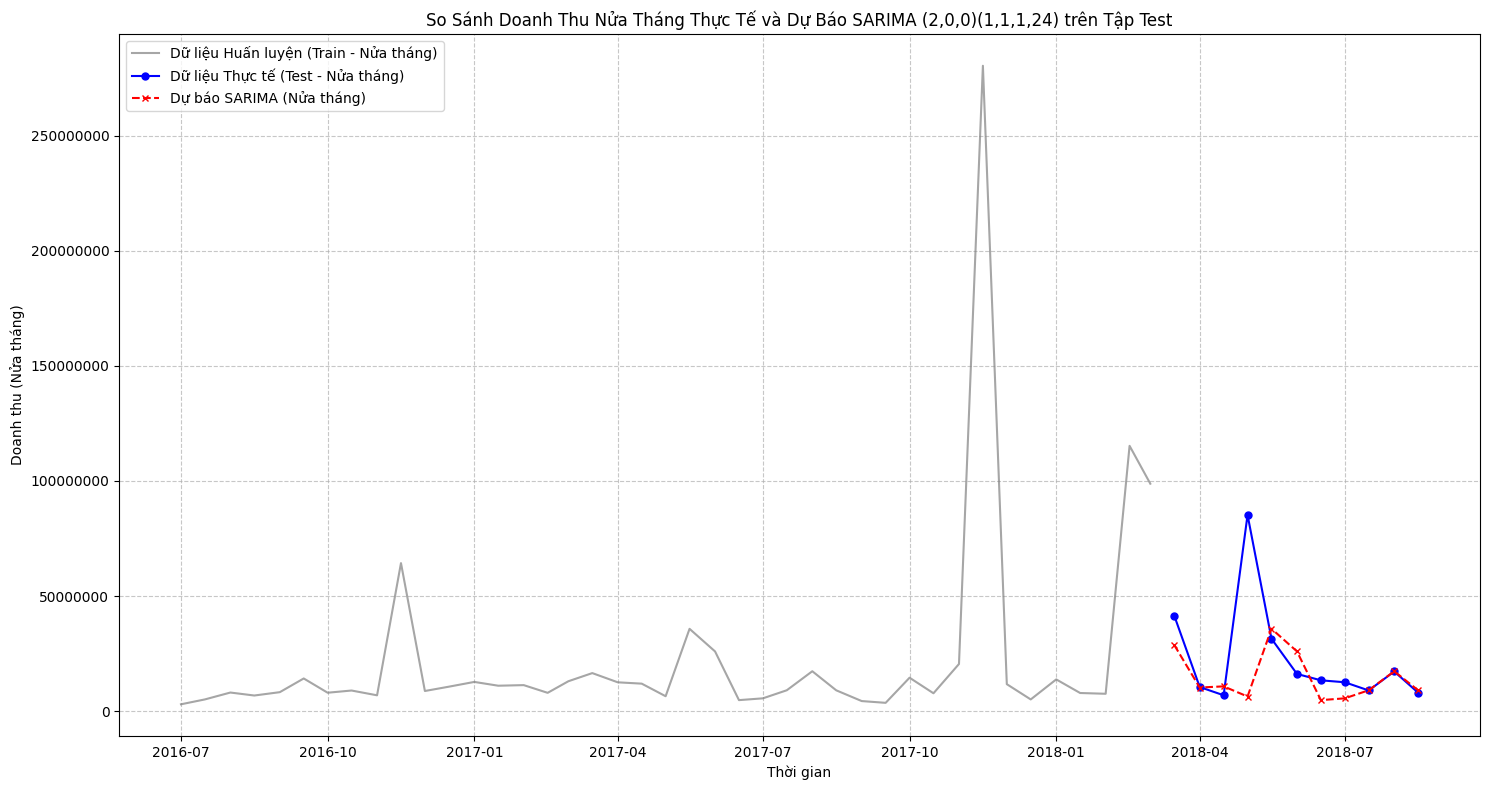


--- Kết thúc Bước 4 ---


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Bước 4: Đánh giá Mô hình (cho dữ liệu nửa tháng) ---
print("\n--- Bước 4: Đánh giá Mô hình (Dữ liệu nửa tháng) ---")


if 'test_data_hm' in locals() and 'predictions_sarima_hm' in locals() and \
   not test_data_hm.empty and not predictions_sarima_hm.empty and \
   len(test_data_hm) == len(predictions_sarima_hm):
    try:
        rmse_sarima_hm = np.sqrt(mean_squared_error(test_data_hm, predictions_sarima_hm))
        mae_sarima_hm = mean_absolute_error(test_data_hm, predictions_sarima_hm)

        # Tính MAPE
        test_data_for_mape_hm = test_data_hm.replace(0, 1e-9) # Thay 0 bằng số rất nhỏ
        mape_sarima_hm = np.mean(np.abs((test_data_hm - predictions_sarima_hm) / test_data_for_mape_hm)) * 100

        print(f'\nĐánh giá mô hình SARIMA({p},{d},{q})({P},{D},{Q},{m}) trên tập test (nửa tháng):')
        print(f'RMSE: {rmse_sarima_hm:.2f}')
        print(f'MAE: {mae_sarima_hm:.2f}')
        print(f'MAPE: {mape_sarima_hm:.2f}%')

        # Trực quan hóa dự báo so với thực tế trên tập test
        plt.figure(figsize=(15, 8))

        if 'train_data_hm' in locals() and not train_data_hm.empty:
            plt.plot(train_data_hm.index, train_data_hm, label='Dữ liệu Huấn luyện (Train - Nửa tháng)', color='gray', alpha=0.7)

        plt.plot(test_data_hm.index, test_data_hm, label='Dữ liệu Thực tế (Test - Nửa tháng)', color='blue', marker='o', markersize=5)
        plt.plot(predictions_sarima_hm.index, predictions_sarima_hm, label=f'Dự báo SARIMA (Nửa tháng)', color='red', linestyle='--', marker='x', markersize=5)

        plt.title(f'So Sánh Doanh Thu Nửa Tháng Thực Tế và Dự Báo SARIMA ({p},{d},{q})({P},{D},{Q},{m}) trên Tập Test')
        plt.xlabel('Thời gian')
        plt.ylabel('Doanh thu (Nửa tháng)')

        # Định dạng trục Y
        ax = plt.gca()
        ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
        ax.ticklabel_format(style='plain', axis='y')

        plt.legend(loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Lỗi khi đánh giá mô hình SARIMA (nửa tháng): {e}")

elif 'test_data_hm' in locals() and 'predictions_sarima_hm' in locals() and \
     not test_data_hm.empty and not predictions_sarima_hm.empty and \
     len(test_data_hm) != len(predictions_sarima_hm):
    print("\nLỗi: Độ dài của test_data_hm và predictions_sarima_hm không khớp. Không thể đánh giá.")
    print(f"Độ dài test_data_hm: {len(test_data_hm)}, Độ dài predictions_sarima_hm: {len(predictions_sarima_hm)}")
else:
    print("\nKhông có đủ dữ liệu test (test_data_hm) hoặc dự báo (predictions_sarima_hm) để đánh giá.")
    print("Điều này có thể xảy ra nếu toàn bộ dữ liệu đã được dùng để huấn luyện ở Bước 3,")
    print("hoặc nếu xảy ra lỗi trong quá trình huấn luyện/dự báo.")
    if 'model_sarima_fitted_hm' in locals() and model_sarima_fitted_hm is not None:
        print("Mô hình đã được huấn luyện trên toàn bộ dữ liệu và sẵn sàng cho Bước 5 (Dự báo tương lai).")

print("\n--- Kết thúc Bước 4 ---")

#### Nhận xét Bước 4: Đánh giá SARIMA(2,0,0)(1,1,1,24)

Kết quả đánh giá mô hình `SARIMA(2,0,0)(1,1,1,24)` trên tập kiểm tra:

* **RMSE: 24,562,644.24**
* **MAE: 11,512,872.95**
* **MAPE: 35.41%**

**Đánh giá:**

1.  **Hiệu suất (MAPE 35.41%):**
    * Sai số trung bình ~35% là **tương đối cao**, cho thấy dự báo còn chênh lệch đáng kể so với thực tế.
    * Tuy nhiên, so với các thử nghiệm ban đầu (dự báo phẳng), mô hình này đã **cải thiện rõ rệt**, cố gắng bám theo cấu trúc mùa vụ của dữ liệu.

2.  **Phân tích Biểu đồ :**
    * Dự báo (đỏ) đã thể hiện được một phần tính mùa vụ, theo được các đỉnh/đáy của dữ liệu thực tế (xanh).
    * Vẫn còn **lệch pha** hoặc **không đạt độ lớn** của các biến động thực tế, góp phần vào MAPE cao.

3.  **Nguyên nhân/Hạn chế:**
    * **Độ phức tạp mô hình vs. Dữ liệu ngắn:** Mô hình mùa vụ `(1,1,1,24)` khá phức tạp cho tập huấn luyện chỉ 41 điểm. Điều này gây khó khăn cho việc ước lượng tham số chính xác.
    * **Ổn định tham số:** Nếu các tham số không ổn định (như cảnh báo ở Bước 3), hiệu suất dự báo sẽ bị ảnh hưởng.

**Kết luận:**
Mô hình `SARIMA(2,0,0)(1,1,1,24)` có cải thiện nhưng hiệu suất vẫn cần nâng cao (MAPE 35.41%). Nên tiếp tục thử nghiệm các bộ tham số **SARIMA đơn giản hơn** (đặc biệt cho mùa vụ, ví dụ `D=0`), phân tích kỹ phần dư, và cân nhắc giới hạn do lượng dữ liệu ít.

### Bước 5: Dự báo Tương lai và Trực quan hóa



--- Bước 5: Thực hiện Dự báo cho Tương Lai (Dữ liệu nửa tháng) ---

Đang huấn luyện lại mô hình SARIMA trên toàn bộ dữ liệu lịch sử (half_monthly_sales) để dự báo tương lai...
Sử dụng tham số: order=(2, 0, 0), seasonal_order=(1, 1, 1, 24)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Đã huấn luyện lại mô hình trên toàn bộ dữ liệu half_monthly_sales.

Thực hiện dự báo cho 24 kỳ nửa tháng tới...

Dự báo doanh thu cho 24 kỳ nửa tháng tới (SARIMA (2, 0, 0)(1, 1, 1, 24)):
2018-09-01    4.115574e+06
2018-09-16    3.410903e+06
2018-10-01    1.468282e+07
2018-10-16    7.761921e+06
2018-11-01    2.077978e+07
2018-11-16    2.846927e+08
2018-12-01    1.180199e+07
2018-12-16    4.994857e+06
2019-01-01    1.383043e+07
2019-01-16    7.835148e+06
2019-02-01    7.490645e+06
2019-02-16    1.174249e+08
2019-03-01    1.005514e+08
2019-03-16    4.204833e+07
2019-04-01    1.044924e+07
2019-04-16    6.816049e+06
2019-05-01    8.684914e+07
2019-05-16    3.138907e+07
2019-06-01    1.598060e+07
2019-06-16    1.358718e+07
2019-07-01    1.271133e+07
2019-07-16    9.009021e+06
2019-08-01    1.724939e+07
2019-08-16    8.016286e+06
Name: predicted_mean, dtype: float64

Khoảng tin cậy 95% cho dự báo (SAU KHI cắt giới hạn dưới âm về 0):
            lower grand_total  upper grand_total
2018-09-01 

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


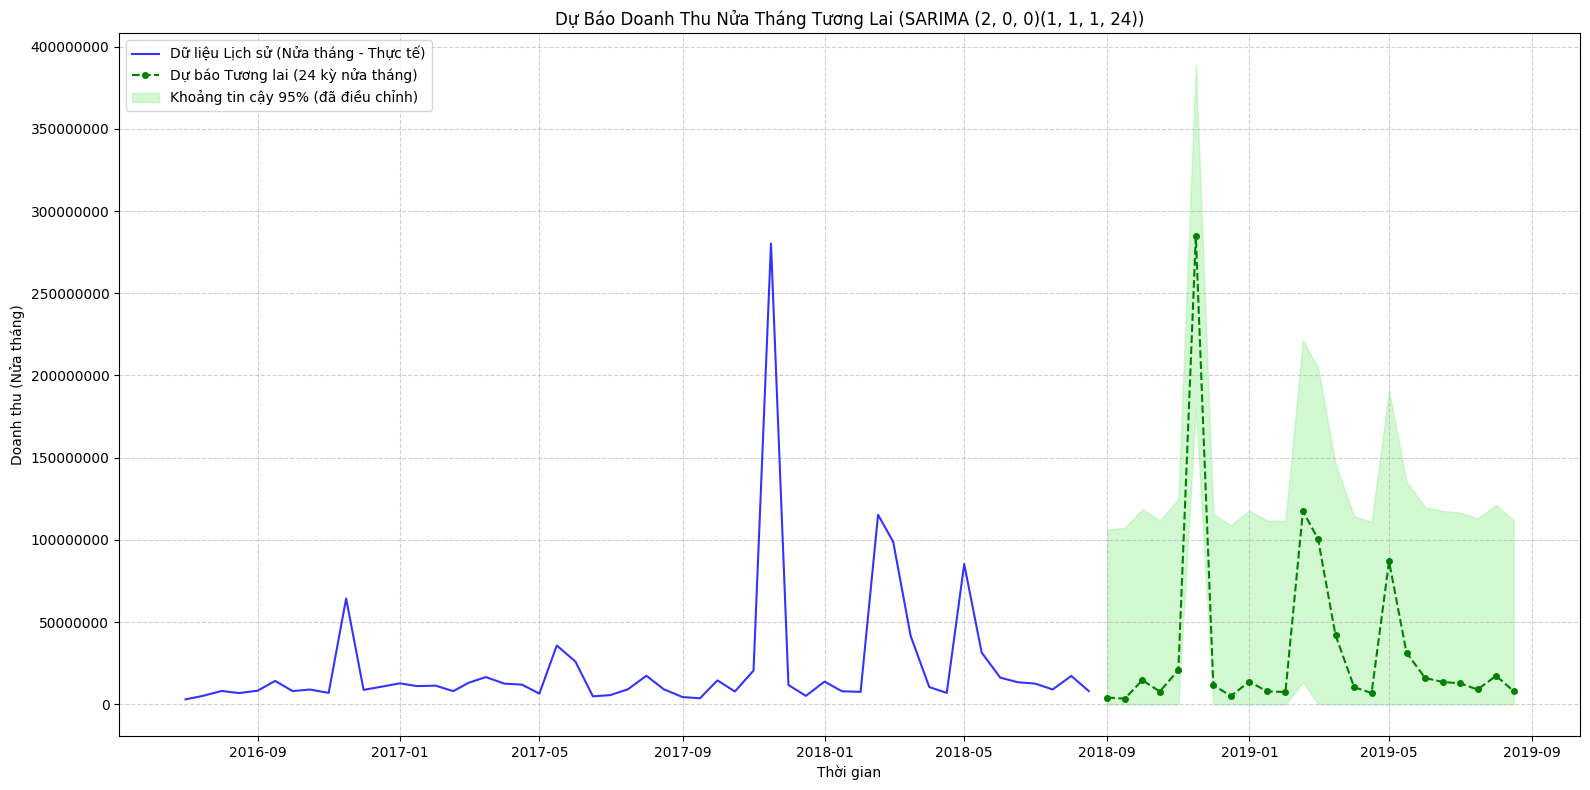


--- Kết thúc Bước 5 ---


In [ ]:
# --- Bước 5: Thực hiện Dự báo cho Tương Lai (Dữ liệu nửa tháng) ---
print("\n\n--- Bước 5: Thực hiện Dự báo cho Tương Lai (Dữ liệu nửa tháng) ---")

model_for_future_forecasts_hm = None

final_order_params = (p, d, q)
final_seasonal_order_params = (P, D, Q, m)


if 'model_sarima_fitted_hm' in locals() and model_sarima_fitted_hm is not None:

    if 'test_data_hm' in locals() and not test_data_hm.empty:

        print("\nĐang huấn luyện lại mô hình SARIMA trên toàn bộ dữ liệu lịch sử (half_monthly_sales) để dự báo tương lai...")
        print(f"Sử dụng tham số: order={final_order_params}, seasonal_order={final_seasonal_order_params}")
        try:
            model_refit_full_data = ARIMA(half_monthly_sales,
                                          order=final_order_params,
                                          seasonal_order=final_seasonal_order_params,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
            model_for_future_forecasts_hm = model_refit_full_data.fit()
            print("Đã huấn luyện lại mô hình trên toàn bộ dữ liệu half_monthly_sales.")
        except Exception as e:
            print(f"Lỗi khi huấn luyện lại mô hình trên toàn bộ dữ liệu: {e}")
            print("Sẽ thử sử dụng mô hình đã huấn luyện trước đó (model_sarima_fitted_hm) nếu có (có thể không tối ưu cho dự báo toàn cục).")
            model_for_future_forecasts_hm = model_sarima_fitted_hm
    else:
        print("\nSử dụng mô hình đã được huấn luyện trên toàn bộ dữ liệu từ Bước 3 (model_sarima_fitted_hm).")
        model_for_future_forecasts_hm = model_sarima_fitted_hm

    if model_for_future_forecasts_hm is not None:
        # Số kỳ NỬA THÁNG muốn dự báo cho tương lai (ví dụ: 1 năm = 24 kỳ nửa tháng)
        n_periods_forecast = 24
        print(f"\nThực hiện dự báo cho {n_periods_forecast} kỳ nửa tháng tới...")

        try:
            # Lấy kết quả dự báo và khoảng tin cậy
            future_forecast_results = model_for_future_forecasts_hm.get_forecast(steps=n_periods_forecast)
            future_forecast_values_hm = future_forecast_results.predicted_mean
            confidence_intervals_hm = future_forecast_results.conf_int()

            # Tạo index ngày tháng cho các giá trị dự báo (ngày 1 và 16 của các tháng tiếp theo)
            if 'half_monthly_sales' in locals() and not half_monthly_sales.empty:
                last_date_hist = half_monthly_sales.index[-1] # Ngày cuối cùng trong dữ liệu lịch sử

                future_dates_list = []
                current_future_dt = last_date_hist # Bắt đầu từ ngày cuối của lịch sử để tính ngày tiếp theo
                for _ in range(n_periods_forecast):
                    if current_future_dt.day == 1: # Nếu ngày hiện tại là mùng 1
                        current_future_dt = current_future_dt.replace(day=16) # Ngày tiếp theo là 16 cùng tháng
                    else: # Nếu ngày hiện tại là 16
                        # Ngày tiếp theo là mùng 1 của tháng kế tiếp
                        current_future_dt = (current_future_dt.replace(day=1) + pd.DateOffset(months=1))
                    future_dates_list.append(current_future_dt)

                future_dates_idx = pd.DatetimeIndex(future_dates_list) # Tạo DatetimeIndex

                # Gán index cho dự báo và khoảng tin cậy
                future_forecast_values_hm.index = future_dates_idx
                confidence_intervals_hm.index = future_dates_idx

                print(f"\nDự báo doanh thu cho {n_periods_forecast} kỳ nửa tháng tới (SARIMA {final_order_params}{final_seasonal_order_params}):")
                print(future_forecast_values_hm)



                # Lấy tên cột giới hạn dưới một cách linh hoạt
                lower_col_name_ci = [col for col in confidence_intervals_hm.columns if 'lower' in col.lower()][0]
                confidence_intervals_hm[lower_col_name_ci] = np.maximum(0, confidence_intervals_hm[lower_col_name_ci])
                print("\nKhoảng tin cậy 95% cho dự báo (SAU KHI cắt giới hạn dưới âm về 0):")
                print(confidence_intervals_hm)


                # Trực quan hóa dữ liệu lịch sử và dự báo tương lai
                plt.figure(figsize=(16, 8))
                plt.plot(half_monthly_sales.index, half_monthly_sales, label='Dữ liệu Lịch sử (Nửa tháng - Thực tế)', color='blue', alpha=0.8)
                plt.plot(future_forecast_values_hm.index, future_forecast_values_hm, label=f'Dự báo Tương lai ({n_periods_forecast} kỳ nửa tháng)', color='green', linestyle='--', marker='o', markersize=4)

                # Lấy tên cột giới hạn trên một cách linh hoạt
                upper_col_name_ci = [col for col in confidence_intervals_hm.columns if 'upper' in col.lower()][0]
                plt.fill_between(confidence_intervals_hm.index,
                                 confidence_intervals_hm[lower_col_name_ci],
                                 confidence_intervals_hm[upper_col_name_ci],
                                 color='lightgreen', alpha=0.4, label='Khoảng tin cậy 95% (đã điều chỉnh)')

                plt.title(f'Dự Báo Doanh Thu Nửa Tháng Tương Lai (SARIMA {final_order_params}{final_seasonal_order_params})')
                plt.xlabel('Thời gian')
                plt.ylabel('Doanh thu (Nửa tháng)')

                ax = plt.gca()
                ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
                ax.ticklabel_format(style='plain', axis='y')

                plt.legend(loc='upper left')
                plt.grid(True, linestyle='--', alpha=0.6)
                plt.tight_layout()
                plt.show()

                try:
                    forecast_df_to_save = pd.DataFrame({
                        'forecasted_value': future_forecast_values_hm,
                        'lower_ci_adjusted': confidence_intervals_hm[lower_col_name_ci], # Đã điều chỉnh
                        'upper_ci': confidence_intervals_hm[upper_col_name_ci]
                    })
                    forecast_df_to_save.index.name = 'date_half_month_start'

                except Exception as e_save:
                    print(f"Lỗi khi lưu file CSV dự báo: {e_save}")
            else:
                print("Lỗi: Không có dữ liệu 'half_monthly_sales' để xác định ngày bắt đầu cho việc tạo index ngày dự báo.")
        except Exception as e_forecast:
            print(f"Lỗi khi thực hiện dự báo hoặc tạo index ngày tương lai: {e_forecast}")
    else:
        print("\nKhông có mô hình phù hợp (model_for_future_forecasts_hm is None) để thực hiện dự báo tương lai.")
else:
    print("\nKhông có mô hình đã huấn luyện từ Bước 3 (model_sarima_fitted_hm is None). Không thể thực hiện dự báo tương lai.")

print("\n--- Kết thúc Bước 5 ---")

#### Nhận xét Bước 5: Dự báo Tương lai với SARIMA(2,0,0)(1,1,1,24)

Sau khi huấn luyện lại mô hình trên toàn bộ dữ liệu `half_monthly_sales`, Bước 5 thực hiện dự báo cho 24 kỳ nửa tháng tới.

**Kết quả chính:**

1.  **Dự báo Điểm:** Mô hình tạo ra các dự báo điểm cố gắng tái tạo cấu trúc mùa vụ đã học (ví dụ: `2018-11-16: 2.84e+08`, `2019-02-16: 1.17e+08`).
2.  **Khoảng Tin Cậy (Đã cắt giới hạn âm):**
    * **Rất rộng và mở rộng nhanh chóng:** Cho thấy độ không chắc chắn cao của mô hình khi dự báo xa, đặc biệt là với giới hạn dưới thường xuyên chạm mức 0 (sau điều chỉnh). Ví dụ, `2018-09-01`: (0, ~1.06e+08); `2019-07-01`: (0, ~1.16e+08).
    * **Nguyên nhân:** Chủ yếu do lượng dữ liệu lịch sử (51 điểm) quá ngắn so với độ phức tạp của mô hình và chu kỳ mùa vụ dài (`m=24`). Sai phân mùa vụ (`D=1`) cũng có thể góp phần.
3.  **Cảnh báo `statsmodels`:**
    * `ValueWarning: A date index has been provided, but it has no associated frequency information...`: Index ngày không có thông tin tần suất rõ ràng cho `statsmodels`. Điều này đã được xử lý bằng cách gán index thủ công cho kết quả dự báo.
    * `ValueWarning: No supported index is available...`: Liên quan đến việc tạo index cho dự báo, cũng đã được xử lý.

**Đánh giá chung:**
Mô hình `SARIMA(2,0,0)(1,1,1,24)` tạo ra dự báo tương lai có cấu trúc mùa vụ. Tuy nhiên, **độ tin cậy của các dự báo này (đặc biệt là dài hạn) thấp** do khoảng tin cậy rất rộng và thường xuyên chạm mức 0 ở giới hạn dưới. Điều này nhấn mạnh hạn chế của việc dùng mô hình phức tạp trên dữ liệu ngắn.

**Kết luận:**
Dự báo có thể cung cấp một số định hướng ngắn hạn, nhưng cần cẩn trọng khi sử dụng cho quyết định dài hạn do độ không chắc chắn cao. Cải thiện mô hình (tham số đơn giản hơn, thêm dữ liệu) là cần thiết để tăng độ tin cậy.

### Hướng Phát triển và Cải thiện Mô hình

Dựa trên quá trình xây dựng và đánh giá mô hình SARIMA dự báo doanh thu nửa tháng, đây là các hướng phát triển tiềm năng:

1.  **Thu thập Thêm Dữ liệu Lịch sử:**
    * Đây là yếu tố quan trọng nhất. Với chu kỳ mùa vụ `m=24`, lượng dữ liệu hiện tại (51 điểm) rất hạn chế. Có thêm dữ liệu (ví dụ, vài năm) sẽ giúp mô hình học các mẫu mùa vụ và xu hướng ổn định hơn, cải thiện độ chính xác và giảm độ rộng khoảng tin cậy.

2.  **Tinh chỉnh Tham số SARIMA:**
    * **Thử nghiệm các bộ tham số đơn giản hơn:** Đặc biệt cho thành phần mùa vụ `(P,D,Q,24)`. Ví dụ, bắt đầu với `D=0` và các giá trị P, Q nhỏ (0 hoặc 1) dựa trên phân tích kỹ ACF/PACF của chuỗi gốc với `lags` dài.
    * **Sử dụng `auto_arima` (pmdarima):** Để có thêm gợi ý về các bộ tham số tiềm năng, đặc biệt khi dữ liệu hạn chế.
    * **Phân tích kỹ phần dư (residuals):** Đảm bảo phần dư của mô hình tốt nhất không còn cấu trúc tự tương quan đáng kể.

3.  **Xem xét Các Mô hình Khác:**
    * **Holt-Winters (Exponential Smoothing):** Có thể hoạt động tốt hơn SARIMA với chuỗi thời gian ngắn hơn và có tính mùa vụ rõ ràng.
    * **Prophet (Facebook):** Được thiết kế để xử lý tốt tính mùa vụ, ngày lễ, và các điểm thay đổi.
    * **Mô hình Machine Learning (ví dụ: LSTM, XGBoost):** Nếu có thêm các biến ngoại sinh (feature engineering), các mô hình này có thể mang lại hiệu quả, nhưng cũng đòi hỏi nhiều dữ liệu hơn.

4.  **Xử lý Outliers và Biến đổi Dữ liệu:**
    * Xác định và xử lý các điểm dữ liệu bất thường (outliers) có thể ảnh hưởng đến việc ước lượng tham số.
    * Nếu phương sai của doanh thu thay đổi theo mức độ, thử biến đổi logarit (`np.log()`) cho dữ liệu đầu vào để ổn định phương sai.

5.  **Tích hợp Biến Ngoại sinh (SARIMAX):**
    * Nếu có thông tin về các yếu tố bên ngoài ảnh hưởng đến doanh thu (ví dụ: các chiến dịch marketing, ngày lễ đặc biệt không theo chu kỳ cố định, các chỉ số kinh tế), việc đưa chúng vào mô hình dưới dạng biến ngoại sinh (SARIMAX) có thể cải thiện đáng kể độ chính xác.

6.  **Đánh giá Chéo Chuỗi Thời gian (Time Series Cross-Validation):**
    * Để có đánh giá khách quan hơn về hiệu suất mô hình, đặc biệt khi dữ liệu ít, sử dụng các kỹ thuật như "rolling forecast origin" thay vì chỉ chia train/test một lần.

Ưu tiên hàng đầu nên là cố gắng có thêm dữ liệu nếu có thể, song song với việc thử nghiệm các mô hình đơn giản hơn và tinh chỉnh tham số SARIMA một cách cẩn trọng.

### Kết luận về Mô hình Dự báo Doanh số

Qua quá trình xây dựng, mô hình SARIMA đã được áp dụng để dự báo doanh thu theo từng nửa tháng dựa trên dữ liệu lịch sử.

**Những điểm chính:**

1.  **Chuẩn bị dữ liệu:** Dữ liệu giao dịch được làm sạch, xử lý và tổng hợp thành chuỗi thời gian `half_monthly_sales` với tần suất nửa tháng, đảm bảo tính liên tục cho phân tích.
2.  **Phân tích khám phá (EDA):**
    * Chuỗi `half_monthly_sales` được xác định là **có tính dừng** qua kiểm định ADF (`d=0`).
    * Biểu đồ ACF/PACF cho thấy sự hiện diện của **tính mùa vụ hàng năm** (đỉnh ở trễ 24, với `m=24`) và gợi ý các tham số không mùa vụ (ví dụ `p=2, q=0`).
3.  **Xây dựng và Đánh giá Mô hình:**
    * Mô hình `SARIMA(2,0,0)(1,1,1,24)` đã được thử nghiệm. Kết quả ban đầu cho thấy mô hình cố gắng nắm bắt cấu trúc mùa vụ nhưng gặp vấn đề về ước lượng tham số và độ ổn định do **dữ liệu huấn luyện ngắn** (41 điểm).
    * Đánh giá trên tập test cho thấy MAPE khoảng **35.41%**, là một sự cải thiện so với các mô hình đơn giản hơn ban đầu, nhưng vẫn còn ở mức tương đối cao.
4.  **Dự báo Tương lai:**
    * Mô hình (sau khi huấn luyện lại trên toàn bộ dữ liệu) đã đưa ra dự báo cho 1 năm tới, tiếp tục thể hiện cấu trúc mùa vụ.
    * Tuy nhiên, **khoảng tin cậy rất rộng** và có giới hạn dưới chạm mức 0 (sau khi điều chỉnh giá trị âm), phản ánh độ không chắc chắn cao của dự báo, chủ yếu do hạn chế về lượng dữ liệu.

**Kết luận chung:**

Mô hình SARIMA đã cho thấy khả năng mô hình hóa một phần tính mùa vụ và xu hướng trong dữ liệu doanh thu nửa tháng. Tuy nhiên, **hiệu suất và độ tin cậy của mô hình bị giới hạn đáng kể bởi lượng dữ liệu lịch sử ngắn (51 điểm)** so với chu kỳ mùa vụ dài (`m=24`) và độ phức tạp của mô hình.

Mặc dù MAPE 35.41% có thể được coi là "hợp lý" trong một số bối cảnh dữ liệu khó dự báo hoặc ngắn, mô hình hiện tại vẫn cần được cải thiện nếu muốn đạt độ chính xác cao hơn và khoảng tin cậy hẹp hơn cho các quyết định kinh doanh quan trọng.

**Hướng phát triển chính:** Tập trung vào việc thu thập thêm dữ liệu lịch sử, thử nghiệm các bộ tham số SARIMA đơn giản hơn, hoặc xem xét các phương pháp dự báo khác phù hợp hơn với chuỗi thời gian ngắn.